In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

In [2]:
url1 = 'https://raw.githubusercontent.com/jessonpagaduan/covid19policydatabase/master/ADBCovid19-export-2020-07-04.csv'

In [3]:
df1 = pd.read_csv(url1)

In [4]:
df1

,Region,Country,Measure Code,Measure,Currency Code,Amount (Local),Amount USD,Source,Post Date,Details
0,Central and West Asia,Afghanistan,01,01 - Liquidity Support,AFN,NaN,NaN,NaN,2020-06-29,NaN
1,Central and West Asia,Afghanistan,01A,01A - Short-term lending,AFN,NaN,NaN,NaN,2020-06-29,NaN
2,Central and West Asia,Afghanistan,01B,01B - Support policies for short-term lending,AFN,NaN,NaN,IMF. https://www.imf.org/en/Topics/imf-and-cov...,2020-06-29,No estimate/amount: The Financial Stability Co...
3,Central and West Asia,Afghanistan,01C,01C - Forex operations,AFN,NaN,NaN,IMF. https://www.imf.org/en/Topics/imf-and-cov...,2020-06-29,No amount/estimate: (i) DAB is in discussions ...
4,Central and West Asia,Afghanistan,02,02 - Credit creation,AFN,NaN,NaN,NaN,2020-06-29,NaN
...,...,...,...,...,...,...,...,...,...,...
2365,Southeast Asia,Viet Nam,09A,09A - Swaps,VND,NaN,NaN,NaN,2020-06-29,NaN
2366,Southeast Asia,Viet Nam,09B,09B - International loans/grants,VND,NaN,NaN,NaN,2020-06-29,NaN
2367,Southeast Asia,Viet Nam,10,10 - No breakdown,VND,NaN,NaN,NaN,2020-06-29,NaN
2368,Southeast Asia,Viet Nam,11,11 - Other Economic Measures,VND,NaN,NaN,"IMF,MOF, SBV. https://www.imf.org/en/Topics/im...",2020-06-29,"(i) On March 31, the State Bank of Vietnam ins..."


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2370 entries, 0 to 2369
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          2370 non-null   object 
 1   Country         2370 non-null   object 
 2   Measure Code    2370 non-null   object 
 3   Measure         2370 non-null   object 
 4   Currency Code   2370 non-null   object 
 5   Amount (Local)  778 non-null    float64
 6   Amount USD      778 non-null    float64
 7   Source          853 non-null    object 
 8   Post Date       2370 non-null   object 
 9   Details         852 non-null    object 
dtypes: float64(2), object(8)
memory usage: 185.3+ KB


In [6]:
df1.drop(columns=['Source', 'Post Date', 'Details'], inplace=True)

In [7]:
df1

,Region,Country,Measure Code,Measure,Currency Code,Amount (Local),Amount USD
0,Central and West Asia,Afghanistan,01,01 - Liquidity Support,AFN,NaN,NaN
1,Central and West Asia,Afghanistan,01A,01A - Short-term lending,AFN,NaN,NaN
2,Central and West Asia,Afghanistan,01B,01B - Support policies for short-term lending,AFN,NaN,NaN
3,Central and West Asia,Afghanistan,01C,01C - Forex operations,AFN,NaN,NaN
4,Central and West Asia,Afghanistan,02,02 - Credit creation,AFN,NaN,NaN
...,...,...,...,...,...,...,...
2365,Southeast Asia,Viet Nam,09A,09A - Swaps,VND,NaN,NaN
2366,Southeast Asia,Viet Nam,09B,09B - International loans/grants,VND,NaN,NaN
2367,Southeast Asia,Viet Nam,10,10 - No breakdown,VND,NaN,NaN
2368,Southeast Asia,Viet Nam,11,11 - Other Economic Measures,VND,NaN,NaN


In [8]:
df1.columns

Index(['Region', 'Country', 'Measure Code', 'Measure', 'Currency Code',
       'Amount (Local)', 'Amount USD'],
      dtype='object')

In [9]:
df1.columns = ['region', 'country', 'measure_id', 'measure_name', 'currency', 'amount_lcy', 'amount_usd']

In [10]:
df1

,region,country,measure_id,measure_name,currency,amount_lcy,amount_usd
0,Central and West Asia,Afghanistan,01,01 - Liquidity Support,AFN,NaN,NaN
1,Central and West Asia,Afghanistan,01A,01A - Short-term lending,AFN,NaN,NaN
2,Central and West Asia,Afghanistan,01B,01B - Support policies for short-term lending,AFN,NaN,NaN
3,Central and West Asia,Afghanistan,01C,01C - Forex operations,AFN,NaN,NaN
4,Central and West Asia,Afghanistan,02,02 - Credit creation,AFN,NaN,NaN
...,...,...,...,...,...,...,...
2365,Southeast Asia,Viet Nam,09A,09A - Swaps,VND,NaN,NaN
2366,Southeast Asia,Viet Nam,09B,09B - International loans/grants,VND,NaN,NaN
2367,Southeast Asia,Viet Nam,10,10 - No breakdown,VND,NaN,NaN
2368,Southeast Asia,Viet Nam,11,11 - Other Economic Measures,VND,NaN,NaN


In [11]:
df1.set_index(['region', 'country'], inplace=True)

In [12]:
df1

measure_id  \
region                country                  
Central and West Asia Afghanistan         01   
                      Afghanistan        01A   
                      Afghanistan        01B   
                      Afghanistan        01C   
                      Afghanistan         02   
...                                      ...   
Southeast Asia        Viet Nam           09A   
                      Viet Nam           09B   
                      Viet Nam            10   
                      Viet Nam            11   
                      Viet Nam            12   

                                                                    measure_name  \
region                country                                                      
Central and West Asia Afghanistan                         01 - Liquidity Support   
                      Afghanistan                       01A - Short-term lending   
                      Afghanistan  01B - Support policies for short-term lending   
                      Afghanistan                         01C - Forex operations   
                      Afghanistan                           02 - Credit creation   
...                                                                          ...   
Southeast Asia        Viet Nam                                       09A - Swaps   
                      Viet Nam                  09B - International loans/grants   
                      Viet Nam                                 10 - No breakdown   
                      Viet Nam                      11 - Other Economic Measures   
                      Viet Nam                        12 - Non-Economic Measures   

                                  currency  amount_lcy  amount_usd  
region                country                                       
Central and West Asia Afghanistan      AFN         NaN         NaN  
                      Afghanistan      AFN         NaN         NaN  
                      Afghanistan      AFN         NaN         NaN  
                      Afghanistan      AFN         NaN         NaN  
                      Afghanistan      AFN         NaN         NaN  
...                                    ...         ...         ...  
Southeast Asia        Viet Nam         VND         NaN         NaN  
                      Viet Nam         VND         NaN         NaN  
                      Viet Nam         VND         NaN         NaN  
                      Viet Nam         VND         NaN         NaN  
                      Viet Nam         VND         NaN         NaN  

[2370 rows x 5 columns]

In [13]:
df1.index.levels[0]

Index(['Central and West Asia', 'East Asia', 'Other ADB Members',
       'Other Economies', 'Others', 'Pacific', 'South Asia', 'Southeast Asia'],
      dtype='object', name='region')

In [14]:
len(df1.index.levels[0])

8

In [15]:
df1.index.levels[1]

Index(['Afghanistan', 'Arab Republic of Egypt', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belgium', 'Bhutan',
       'Brazil', 'Brunei Darussalam', 'Cambodia', 'Canada', 'Cook Islands',
       'Denmark', 'European Central Bank', 'European Union',
       'Federated States of Micronesia', 'Fiji', 'Finland', 'France',
       'Georgia', 'Germany', 'Hong Kong, China', 'India', 'Indonesia',
       'Ireland', 'Islamic Republic of Iran', 'Italy', 'Japan', 'Kazakhstan',
       'Kiribati', 'Kyrgyz Republic', 'Lao PDR', 'Luxembourg', 'Malaysia',
       'Maldives', 'Marshall Islands', 'Mexico', 'Mongolia', 'Myanmar',
       'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria', 'Niue',
       'Norway', 'Pakistan', 'Palau', 'Papua New Guinea',
       'People's Republic of China', 'Philippines', 'Portugal',
       'Republic of Korea', 'Russian Federation', 'Samoa', 'Saudi Arabia',
       'Singapore', 'Solomon Islands', 'South Africa', 'Spain', 'Sri Lanka

In [16]:
len(df1.index.levels[1])

79

In [17]:
df1.measure_id.unique()

array(['01', '01A', '01B', '01C', '02', '02A', '02B', '02C', '03', '03A',
       '03B', '04', '05', '05A', '05B', '06', '07', '07A', '07B', '08',
       '08A', '08B', '08B1', '08B2', '09', '09A', '09B', '10', '11', '12'],
      dtype=object)

In [18]:
z1 = df1.measure_id.unique()
z2 = [1, 1.1, 1.2, 1.3, 2, 2.1, 2.2, 2.3, 3, 3.1, 3.2, 4, 5, 5.1, 5.2,
                            6, 7, 7.1, 7.2, 8, 8.1, 8.2, 8.21, 8.22, 9, 9.1, 9.2, 10, 11, 12]
z2 = [float(i) for i in z2]
z = zip(z1, z2)
df1.measure_id.replace(dict(z), inplace=True)

In [19]:
df1

measure_id  \
region                country                   
Central and West Asia Afghanistan         1.0   
                      Afghanistan         1.1   
                      Afghanistan         1.2   
                      Afghanistan         1.3   
                      Afghanistan         2.0   
...                                       ...   
Southeast Asia        Viet Nam            9.1   
                      Viet Nam            9.2   
                      Viet Nam           10.0   
                      Viet Nam           11.0   
                      Viet Nam           12.0   

                                                                    measure_name  \
region                country                                                      
Central and West Asia Afghanistan                         01 - Liquidity Support   
                      Afghanistan                       01A - Short-term lending   
                      Afghanistan  01B - Support policies for short-term lending   
                      Afghanistan                         01C - Forex operations   
                      Afghanistan                           02 - Credit creation   
...                                                                          ...   
Southeast Asia        Viet Nam                                       09A - Swaps   
                      Viet Nam                  09B - International loans/grants   
                      Viet Nam                                 10 - No breakdown   
                      Viet Nam                      11 - Other Economic Measures   
                      Viet Nam                        12 - Non-Economic Measures   

                                  currency  amount_lcy  amount_usd  
region                country                                       
Central and West Asia Afghanistan      AFN         NaN         NaN  
                      Afghanistan      AFN         NaN         NaN  
                      Afghanistan      AFN         NaN         NaN  
                      Afghanistan      AFN         NaN         NaN  
                      Afghanistan      AFN         NaN         NaN  
...                                    ...         ...         ...  
Southeast Asia        Viet Nam         VND         NaN         NaN  
                      Viet Nam         VND         NaN         NaN  
                      Viet Nam         VND         NaN         NaN  
                      Viet Nam         VND         NaN         NaN  
                      Viet Nam         VND         NaN         NaN  

[2370 rows x 5 columns]

In [20]:
df1.measure_name.unique()

array(['01 - Liquidity Support', '01A - Short-term lending',
       '01B - Support policies for short-term lending',
       '01C - Forex operations', '02 - Credit creation',
       '02A - Financial sector lending/funding',
       '02B - Support policies for long-term lending',
       '02C - Loan guarantees', '03 - Direct long-term lending',
       '03A - Long-term lending', '03B - Forbearance',
       '04 - Equity support', '05 - Government support to income/revenue',
       '05A - Health', '05B - Non-health', '06 - Budget reallocation',
       '07 - Central bank financing government',
       '07A - Direct lending & reserve drawdown',
       '07B - Secondary purchase: government securities',
       '08 - International Assistance Received', '08A - Swaps',
       '08B - International loans/grants',
       '08B1 - Asian Development Bank', '08B2 - Other',
       '09 - International Assistance Provided', '09A - Swaps',
       '09B - International loans/grants', '10 - No breakdown',
       '

In [21]:
df1[df1.measure_id.isin(list(range(13)))]

measure_id  \
region                country                   
Central and West Asia Afghanistan         1.0   
                      Afghanistan         2.0   
                      Afghanistan         3.0   
                      Afghanistan         4.0   
                      Afghanistan         5.0   
...                                       ...   
Southeast Asia        Viet Nam            8.0   
                      Viet Nam            9.0   
                      Viet Nam           10.0   
                      Viet Nam           11.0   
                      Viet Nam           12.0   

                                                                measure_name  \
region                country                                                  
Central and West Asia Afghanistan                     01 - Liquidity Support   
                      Afghanistan                       02 - Credit creation   
                      Afghanistan              03 - Direct long-term lending   
                      Afghanistan                        04 - Equity support   
                      Afghanistan  05 - Government support to income/revenue   
...                                                                      ...   
Southeast Asia        Viet Nam        08 - International Assistance Received   
                      Viet Nam        09 - International Assistance Provided   
                      Viet Nam                             10 - No breakdown   
                      Viet Nam                  11 - Other Economic Measures   
                      Viet Nam                    12 - Non-Economic Measures   

                                  currency    amount_lcy   amount_usd  
region                country                                          
Central and West Asia Afghanistan      AFN           NaN          NaN  
                      Afghanistan      AFN           NaN          NaN  
                      Afghanistan      AFN           NaN          NaN  
                      Afghanistan      AFN           NaN          NaN  
                      Afghanistan      AFN  8.000000e+09  101662492.0  
...                                    ...           ...          ...  
Southeast Asia        Viet Nam         VND  4.423479e+12  190380000.0  
                      Viet Nam         VND           NaN          NaN  
                      Viet Nam         VND           NaN          NaN  
                      Viet Nam         VND           NaN          NaN  
                      Viet Nam         VND           NaN          NaN  

[948 rows x 5 columns]

In [22]:
df1[df1.measure_id.isin([1, 2, 3, 4, 5, 9, 10])]

measure_id  \
region                country                   
Central and West Asia Afghanistan         1.0   
                      Afghanistan         2.0   
                      Afghanistan         3.0   
                      Afghanistan         4.0   
                      Afghanistan         5.0   
...                                       ...   
Southeast Asia        Viet Nam            3.0   
                      Viet Nam            4.0   
                      Viet Nam            5.0   
                      Viet Nam            9.0   
                      Viet Nam           10.0   

                                                                measure_name  \
region                country                                                  
Central and West Asia Afghanistan                     01 - Liquidity Support   
                      Afghanistan                       02 - Credit creation   
                      Afghanistan              03 - Direct long-term lending   
                      Afghanistan                        04 - Equity support   
                      Afghanistan  05 - Government support to income/revenue   
...                                                                      ...   
Southeast Asia        Viet Nam                 03 - Direct long-term lending   
                      Viet Nam                           04 - Equity support   
                      Viet Nam     05 - Government support to income/revenue   
                      Viet Nam        09 - International Assistance Provided   
                      Viet Nam                             10 - No breakdown   

                                  currency    amount_lcy    amount_usd  
region                country                                           
Central and West Asia Afghanistan      AFN           NaN           NaN  
                      Afghanistan      AFN           NaN           NaN  
                      Afghanistan      AFN           NaN           NaN  
                      Afghanistan      AFN           NaN           NaN  
                      Afghanistan      AFN  8.000000e+09  1.016625e+08  
...                                    ...           ...           ...  
Southeast Asia        Viet Nam         VND  3.160000e+14  1.360017e+10  
                      Viet Nam         VND           NaN           NaN  
                      Viet Nam         VND  2.998000e+14  1.290295e+10  
                      Viet Nam         VND           NaN           NaN  
                      Viet Nam         VND           NaN           NaN  

[553 rows x 5 columns]

In [23]:
df1[df1.measure_id.isin([1, 2, 3, 4, 5, 9, 10])].groupby(level=1).sum().loc[:, 'amount_lcy']

country
Afghanistan               8.000000e+09
Arab Republic of Egypt    3.334800e+11
Argentina                 6.787610e+11
Armenia                   3.000000e+11
Australia                 4.189555e+11
                              ...     
United Kingdom            6.118098e+11
United States             6.851653e+12
Uzbekistan                3.070000e+11
Vanuatu                   5.900000e+09
Viet Nam                  6.158000e+14
Name: amount_lcy, Length: 79, dtype: float64

In [24]:
df1[df1.measure_id.isin([1, 2, 3, 4, 5, 9, 10])].groupby(level=1).sum().loc[:, 'amount_usd']

country
Afghanistan               1.016625e+08
Arab Republic of Egypt    2.122053e+10
Argentina                 1.081691e+10
Armenia                   6.134861e+08
Australia                 2.605065e+11
                              ...     
United Kingdom            7.574831e+11
United States             6.851653e+12
Uzbekistan                3.213240e+07
Vanuatu                   5.014022e+07
Viet Nam                  2.650312e+10
Name: amount_usd, Length: 79, dtype: float64

In [25]:
total_pkg_lcy = df1[df1.measure_id.isin([1, 2, 3, 4, 5, 9, 10])].groupby(level=1).sum().loc[:, 'amount_lcy']
total_pkg_usd = df1[df1.measure_id.isin([1, 2, 3, 4, 5, 9, 10])].groupby(level=1).sum().loc[:, 'amount_usd']
frames = [total_pkg_lcy, total_pkg_usd]
df2 = pd.concat(frames, axis=1)

In [26]:
df2

,amount_lcy,amount_usd
country,,
Afghanistan,8.000000e+09,1.016625e+08
Arab Republic of Egypt,3.334800e+11,2.122053e+10
Argentina,6.787610e+11,1.081691e+10
Armenia,3.000000e+11,6.134861e+08
Australia,4.189555e+11,2.605065e+11
...,...,...
United Kingdom,6.118098e+11,7.574831e+11
United States,6.851653e+12,6.851653e+12
Uzbekistan,3.070000e+11,3.213240e+07


In [27]:
df2.index

Index(['Afghanistan', 'Arab Republic of Egypt', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belgium', 'Bhutan',
       'Brazil', 'Brunei Darussalam', 'Cambodia', 'Canada', 'Cook Islands',
       'Denmark', 'European Central Bank', 'European Union',
       'Federated States of Micronesia', 'Fiji', 'Finland', 'France',
       'Georgia', 'Germany', 'Hong Kong, China', 'India', 'Indonesia',
       'Ireland', 'Islamic Republic of Iran', 'Italy', 'Japan', 'Kazakhstan',
       'Kiribati', 'Kyrgyz Republic', 'Lao PDR', 'Luxembourg', 'Malaysia',
       'Maldives', 'Marshall Islands', 'Mexico', 'Mongolia', 'Myanmar',
       'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria', 'Niue',
       'Norway', 'Pakistan', 'Palau', 'Papua New Guinea',
       'People's Republic of China', 'Philippines', 'Portugal',
       'Republic of Korea', 'Russian Federation', 'Samoa', 'Saudi Arabia',
       'Singapore', 'Solomon Islands', 'South Africa', 'Spain', 'Sri Lanka

In [28]:
df1.index.unique()

MultiIndex([('Central and West Asia',                    'Afghanistan'),
            (      'Other Economies',         'Arab Republic of Egypt'),
            (      'Other Economies',                      'Argentina'),
            ('Central and West Asia',                        'Armenia'),
            (    'Other ADB Members',                      'Australia'),
            (    'Other ADB Members',                        'Austria'),
            ('Central and West Asia',                     'Azerbaijan'),
            (           'South Asia',                     'Bangladesh'),
            (    'Other ADB Members',                        'Belgium'),
            (           'South Asia',                         'Bhutan'),
            (      'Other Economies',                         'Brazil'),
            (       'Southeast Asia',              'Brunei Darussalam'),
            (       'Southeast Asia',                       'Cambodia'),
            (    'Other ADB Members',              

In [29]:
len(df1.index.unique())

79

In [30]:
df2.set_index(df1.index.unique(), inplace=True)

In [31]:
df2

amount_lcy    amount_usd
region                country                                           
Central and West Asia Afghanistan             8.000000e+09  1.016625e+08
Other Economies       Arab Republic of Egypt  3.334800e+11  2.122053e+10
                      Argentina               6.787610e+11  1.081691e+10
Central and West Asia Armenia                 3.000000e+11  6.134861e+08
Other ADB Members     Australia               4.189555e+11  2.605065e+11
...                                                    ...           ...
                      United Kingdom          6.118098e+11  7.574831e+11
                      United States           6.851653e+12  6.851653e+12
Central and West Asia Uzbekistan              3.070000e+11  3.213240e+07
Pacific               Vanuatu                 5.900000e+09  5.014022e+07
Southeast Asia        Viet Nam                6.158000e+14  2.650312e+10

[79 rows x 2 columns]

In [32]:
df2.sort_index(level=0, inplace=True)

In [33]:
df2.index

MultiIndex([('Central and West Asia',                    'Afghanistan'),
            ('Central and West Asia',                        'Armenia'),
            ('Central and West Asia',                     'Azerbaijan'),
            ('Central and West Asia',                        'Georgia'),
            ('Central and West Asia',                     'Kazakhstan'),
            ('Central and West Asia',                'Kyrgyz Republic'),
            ('Central and West Asia',                       'Pakistan'),
            ('Central and West Asia',                     'Tajikistan'),
            ('Central and West Asia',                   'Turkmenistan'),
            ('Central and West Asia',                     'Uzbekistan'),
            (            'East Asia',               'Hong Kong, China'),
            (            'East Asia',                       'Mongolia'),
            (            'East Asia',     'People's Republic of China'),
            (            'East Asia',              

In [34]:
df2

amount_lcy    amount_usd
region                country                                
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08
                      Armenia      3.000000e+11  6.134861e+08
                      Azerbaijan   2.593500e+09  1.525588e+09
                      Georgia      5.334017e+09  1.754188e+09
                      Kazakhstan   9.810000e+12  2.379624e+10
...                                         ...           ...
Southeast Asia        Philippines  1.022064e+12  2.007842e+10
                      Singapore    1.304455e+11  9.209001e+10
                      Thailand     2.700000e+12  8.409179e+10
                      Timor-Leste  2.540000e+08  2.540000e+08
                      Viet Nam     6.158000e+14  2.650312e+10

[79 rows x 2 columns]

In [35]:
df2.groupby(level=0).sum().loc[:, 'amount_usd'].sort_values(ascending=False)

region
Other ADB Members        1.632813e+13
Others                   5.582951e+12
East Asia                2.364410e+12
Other Economies          8.591522e+11
South Asia               3.653912e+11
Southeast Asia           3.593955e+11
Central and West Asia    4.061675e+10
Pacific                  2.479064e+09
Name: amount_usd, dtype: float64

In [36]:
url2 = 'https://raw.githubusercontent.com/jessonpagaduan/covid19policydatabase/master/IMF-WEO_2019-GDP-2018-Popn.csv'

In [37]:
df3 = pd.read_csv(url2)

In [38]:
df3.set_index('country', inplace=True)

In [39]:
df3.columns = ['gdp_lcy', 'gdp_usd', 'popn']

In [40]:
df3

,gdp_lcy,gdp_usd,popn
country,,,
Afghanistan,1.502470e+12,1.873400e+10,37172386.0
Albania,1.705380e+12,1.541800e+10,2866376.0
Algeria,2.044740e+13,1.727810e+11,42228429.0
Angola,3.147410e+13,9.152700e+10,30809762.0
Argentina,2.160310e+13,4.454690e+11,44494502.0
...,...,...,...
"Virgin Islands, British",NaN,NaN,NaN
"Virgin Islands, U.S.",NaN,NaN,NaN
Wallis and Futuna,NaN,NaN,NaN


In [41]:
df2 = df2.join(df3, on='country')

In [42]:
df2

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.593500e+09  1.525588e+09  8.019100e+10   
                      Georgia      5.334017e+09  1.754188e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.022064e+12  2.007842e+10  1.873280e+13   
                      Singapore    1.304455e+11  9.209001e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn  
region                country                                 
Central and West Asia Afghanistan  1.873400e+10   37172386.0  
                      Armenia      1.344400e+10    2951776.0  
                      Azerbaijan   4.717100e+10    9942334.0  
                      Georgia      1.592500e+10    3731000.0  
                      Kazakhstan   1.703260e+11   18276499.0  
...                                         ...          ...  
Southeast Asia        Philippines  3.568140e+11  106651922.0  
                      Singapore    3.628180e+11    5638676.0  
                      Thailand     5.291770e+11   69428524.0  
                      Timor-Leste  2.938000e+09    1267972.0  
                      Viet Nam     2.616370e+11   95540395.0  

[79 rows x 5 columns]

In [43]:
df2.dtypes

amount_lcy    float64
amount_usd    float64
gdp_lcy       float64
gdp_usd       float64
popn          float64
dtype: object

In [44]:
df2 = df2.assign(pkg_gdp = lambda x: 100 * x.amount_usd / x.gdp_usd)
df2 = df2.assign(pkg_pc_usd = lambda x: x.amount_usd / x.popn)

In [45]:
df2

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.593500e+09  1.525588e+09  8.019100e+10   
                      Georgia      5.334017e+09  1.754188e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.022064e+12  2.007842e+10  1.873280e+13   
                      Singapore    1.304455e+11  9.209001e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.234166   
                      Georgia      1.592500e+10    3731000.0  11.015312   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.627140   
                      Singapore    3.628180e+11    5638676.0  25.381875   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd  
region                country                    
Central and West Asia Afghanistan      2.734893  
                      Armenia        207.836264  
                      Azerbaijan     153.443672  
                      Georgia        470.165738  
                      Kazakhstan    1302.013047  
...                                         ...  
Southeast Asia        Philippines    188.261237  
                      Singapore    16331.849993  
                      Thailand      1211.199412  
                      Timor-Leste    200.319881  
                      Viet Nam       277.402247  

[79 rows x 7 columns]

In [46]:
df2.groupby(level=0).sum().loc[['East Asia', 'South Asia', 'Southeast Asia', 'Central and West Asia', 'Pacific'],
                               'amount_usd'].sort_values(ascending=False)

region
East Asia                2.364410e+12
South Asia               3.653912e+11
Southeast Asia           3.593955e+11
Central and West Asia    4.061675e+10
Pacific                  2.479064e+09
Name: amount_usd, dtype: float64

In [47]:
df2.groupby(level=1).max().sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp'].head(10)

country
Japan               66.315194
Finland             52.785605
Germany             52.025802
Hong Kong, China    51.073839
Canada              35.246530
Sweden              32.547315
United States       31.958084
Switzerland         29.785997
Italy               28.577419
United Kingdom      27.609195
Name: pkg_gdp, dtype: float64

Rank region/countries according to policy package

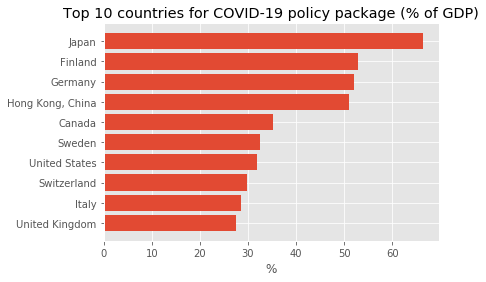

In [48]:
y = df2.groupby(level=1).max().sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp'].head(10)

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('Top 10 countries for COVID-19 policy package (% of GDP)')
ax.set_xlabel('%')

plt.show()


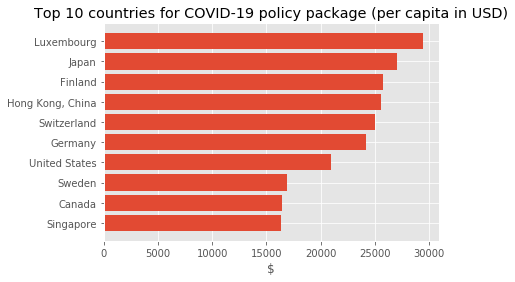

In [49]:
y = df2.groupby(level=1).max().sort_values(by='pkg_pc_usd', ascending=False).loc[:, 'pkg_pc_usd'].head(10)

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('Top 10 countries for COVID-19 policy package (per capita in USD)')
ax.set_xlabel('$')

plt.show()

In [50]:
df2.loc['Southeast Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']

country
Singapore            25.381875
Malaysia             19.818149
Thailand             15.891051
Viet Nam             10.129729
Timor-Leste           8.645337
Cambodia              8.080808
Philippines           5.627140
Indonesia             5.522555
Brunei Darussalam     2.554178
Myanmar               0.149475
Lao PDR               0.054072
Name: pkg_gdp, dtype: float64

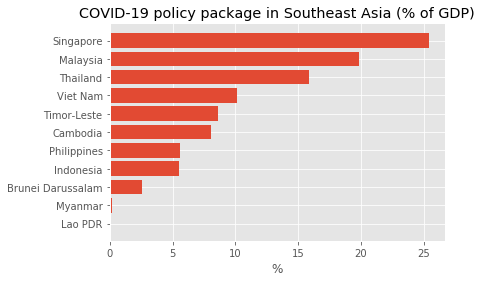

In [51]:
y = df2.loc['Southeast Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('COVID-19 policy package in Southeast Asia (% of GDP)')
ax.set_xlabel('%')

plt.show()

In [52]:
df2.index.levels[0]

Index(['Central and West Asia', 'East Asia', 'Other ADB Members',
       'Other Economies', 'Others', 'Pacific', 'South Asia', 'Southeast Asia'],
      dtype='object', name='region')

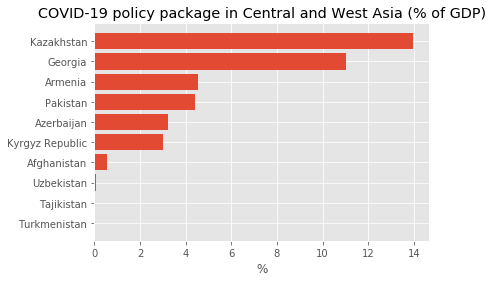

In [53]:
y = df2.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('COVID-19 policy package in Central and West Asia (% of GDP)')
ax.set_xlabel('%')

plt.show()

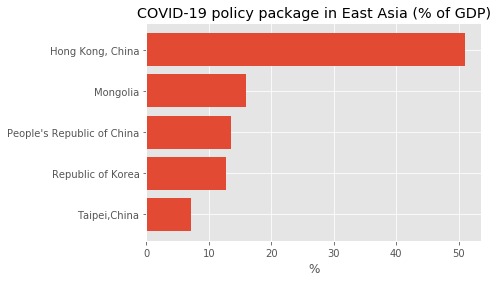

In [54]:
y = df2.loc['East Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('COVID-19 policy package in East Asia (% of GDP)')
ax.set_xlabel('%')

plt.show()

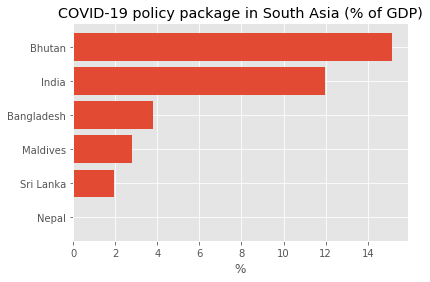

In [55]:
y = df2.loc['South Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('COVID-19 policy package in South Asia (% of GDP)')
ax.set_xlabel('%')

plt.show()

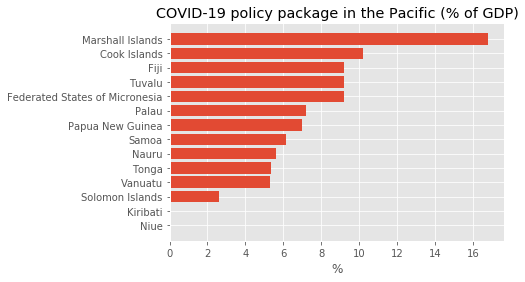

In [56]:
y = df2.loc['Pacific'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('COVID-19 policy package in the Pacific (% of GDP)')
ax.set_xlabel('%')

plt.show()

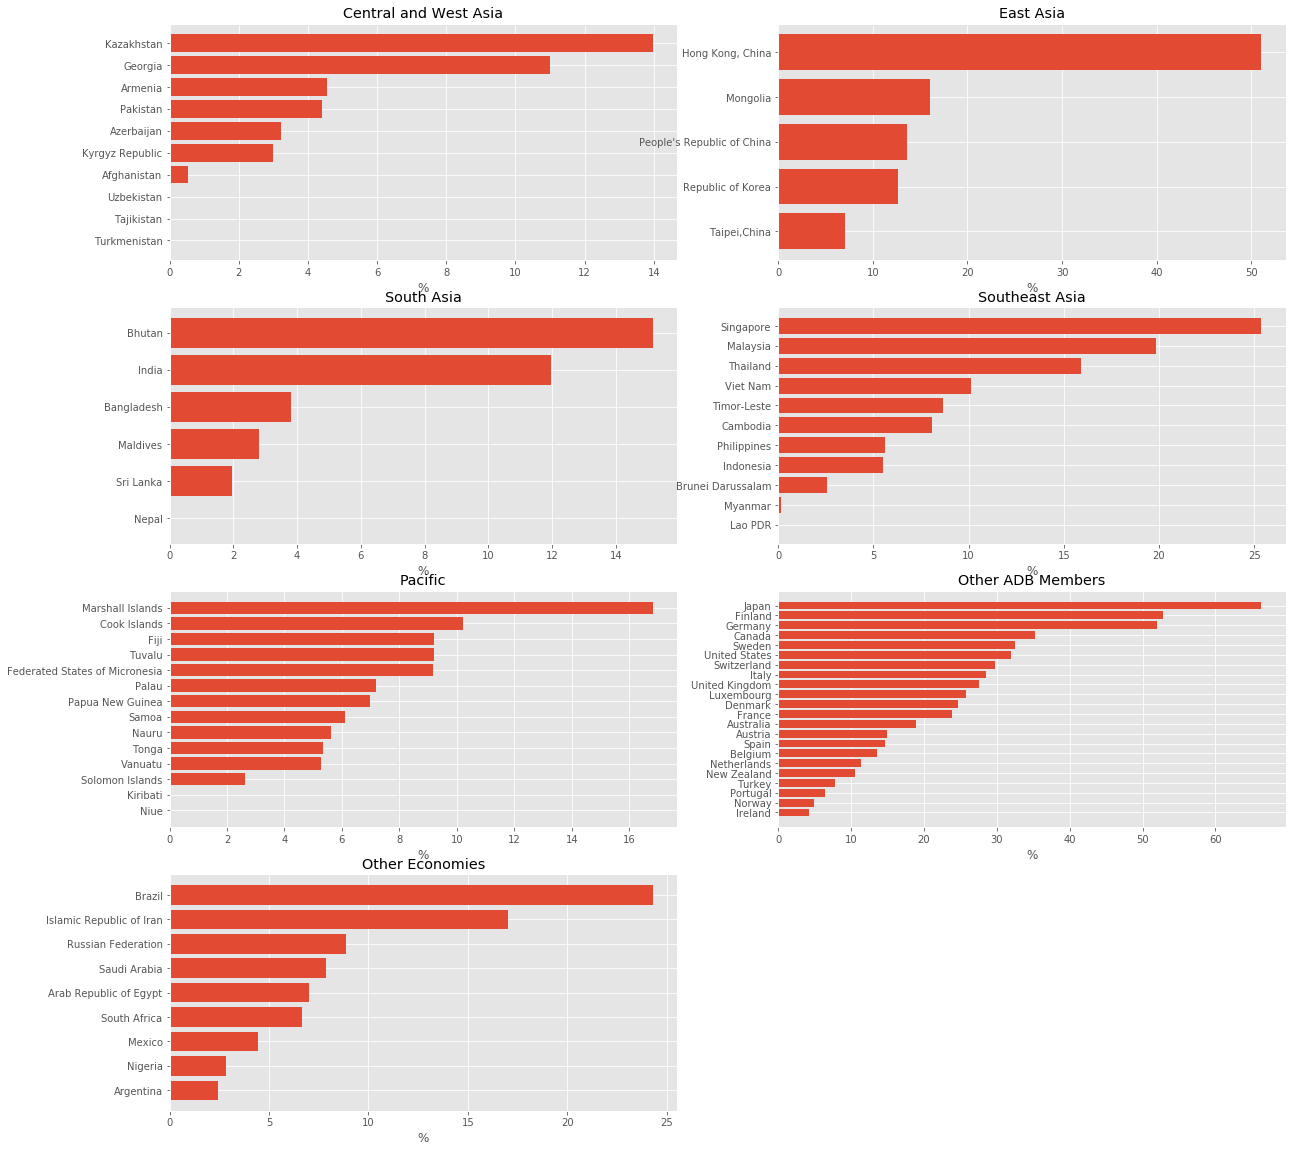

In [57]:
fig, axs= plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

y = df2.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']
axs[0, 0].barh(y.index, y, )
axs[0, 0].invert_yaxis()
axs[0, 0].set_title('Central and West Asia')
axs[0, 0].set_xlabel('%')

y = df2.loc['East Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']
axs[0, 1].barh(y.index, y, )
axs[0, 1].invert_yaxis()
axs[0, 1].set_title('East Asia')
axs[0, 1].set_xlabel('%')

y = df2.loc['South Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']
axs[1, 0].barh(y.index, y, )
axs[1, 0].invert_yaxis()
axs[1, 0].set_title('South Asia')
axs[1, 0].set_xlabel('%')

y = df2.loc['Southeast Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']
axs[1, 1].barh(y.index, y, )
axs[1, 1].invert_yaxis()
axs[1, 1].set_title('Southeast Asia')
axs[1, 1].set_xlabel('%')

y = df2.loc['Pacific'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']
axs[2, 0].barh(y.index, y, )
axs[2, 0].invert_yaxis()
axs[2, 0].set_title('Pacific')
axs[2, 0].set_xlabel('%')

y = df2.loc['Other ADB Members'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']
axs[2, 1].barh(y.index, y, )
axs[2, 1].invert_yaxis()
axs[2, 1].set_title('Other ADB Members')
axs[2, 1].set_xlabel('%')

y = df2.loc['Other Economies'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']
axs[3, 0].barh(y.index, y, )
axs[3, 0].invert_yaxis()
axs[3, 0].set_title('Other Economies')
axs[3, 0].set_xlabel('%')

axs[3, 1].axis('off')

plt.show()

In [58]:
df2.reset_index(level=0)

,region,amount_lcy,amount_usd,gdp_lcy,gdp_usd,popn,pkg_gdp,pkg_pc_usd
country,,,,,,,,
Afghanistan,Central and West Asia,8.000000e+09,1.016625e+08,1.502470e+12,1.873400e+10,37172386.0,0.542663,2.734893
Armenia,Central and West Asia,3.000000e+11,6.134861e+08,6.541000e+12,1.344400e+10,2951776.0,4.563271,207.836264
Azerbaijan,Central and West Asia,2.593500e+09,1.525588e+09,8.019100e+10,4.717100e+10,9942334.0,3.234166,153.443672
Georgia,Central and West Asia,5.334017e+09,1.754188e+09,4.474900e+10,1.592500e+10,3731000.0,11.015312,470.165738
Kazakhstan,Central and West Asia,9.810000e+12,2.379624e+10,6.543920e+13,1.703260e+11,18276499.0,13.970997,1302.013047
...,...,...,...,...,...,...,...,...
Philippines,Southeast Asia,1.022064e+12,2.007842e+10,1.873280e+13,3.568140e+11,106651922.0,5.627140,188.261237
Singapore,Southeast Asia,1.304455e+11,9.209001e+10,4.980840e+11,3.628180e+11,5638676.0,25.381875,16331.849993
Thailand,Southeast Asia,2.700000e+12,8.409179e+10,1.692200e+13,5.291770e+11,69428524.0,15.891051,1211.199412


In [59]:
df2

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.593500e+09  1.525588e+09  8.019100e+10   
                      Georgia      5.334017e+09  1.754188e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.022064e+12  2.007842e+10  1.873280e+13   
                      Singapore    1.304455e+11  9.209001e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.234166   
                      Georgia      1.592500e+10    3731000.0  11.015312   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.627140   
                      Singapore    3.628180e+11    5638676.0  25.381875   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd  
region                country                    
Central and West Asia Afghanistan      2.734893  
                      Armenia        207.836264  
                      Azerbaijan     153.443672  
                      Georgia        470.165738  
                      Kazakhstan    1302.013047  
...                                         ...  
Southeast Asia        Philippines    188.261237  
                      Singapore    16331.849993  
                      Thailand      1211.199412  
                      Timor-Leste    200.319881  
                      Viet Nam       277.402247  

[79 rows x 7 columns]

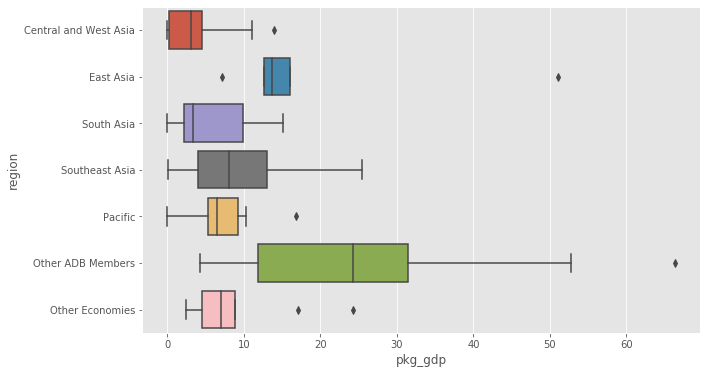

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=df2.reset_index(level=0)['pkg_gdp'], 
            y=df2.reset_index(level=0)['region'],
            order=['Central and West Asia', 'East Asia', 'South Asia', 'Southeast Asia', 'Pacific', 
                   'Other ADB Members', 'Other Economies'])

plt.show()

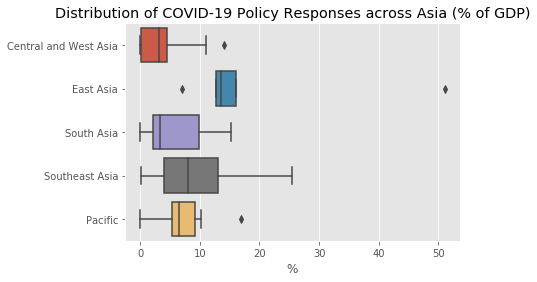

In [61]:
fig, ax = plt.subplots()

sns.boxplot(x=df2.reset_index(level=0)['pkg_gdp'], 
            y=df2.reset_index(level=0)['region'],
            order=['Central and West Asia', 'East Asia', 'South Asia', 'Southeast Asia', 'Pacific'])

ax.set(title='Distribution of COVID-19 Policy Responses across Asia (% of GDP)',
       ylabel='', xlabel='%')

plt.show()

In [62]:
df2.reset_index(level=0).loc[:, ['region', 'pkg_gdp']].groupby('region').mean().sort_values(by='pkg_gdp', ascending=False).index

Index(['Other ADB Members', 'East Asia', 'Southeast Asia', 'Other Economies',
       'Pacific', 'South Asia', 'Central and West Asia', 'Others'],
      dtype='object', name='region')

In [63]:
sorted_index = df2.reset_index(level=0).loc[:, ['region', 'pkg_gdp']].groupby('region').mean().sort_values(by='pkg_gdp', ascending=False).index

In [64]:
mask = sorted_index.isin(['Other ADB Members', 'Other Economies', 'Others'])

In [65]:
sorted_index[~mask]

Index(['East Asia', 'Southeast Asia', 'Pacific', 'South Asia',
       'Central and West Asia'],
      dtype='object', name='region')

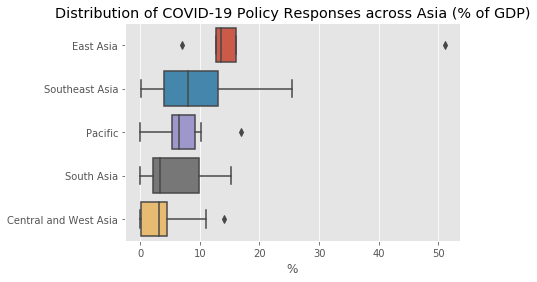

In [66]:
fig, ax = plt.subplots()

sns.boxplot(x=df2.reset_index(level=0)['pkg_gdp'], 
            y=df2.reset_index(level=0)['region'],
            order=['East Asia', 'Southeast Asia', 'Pacific', 'South Asia', 'Central and West Asia'],
            )
# sns.swarmplot(x=df2.reset_index(level=0)['pkg_gdp'], 
#               y=df2.reset_index(level=0)['region'],
#               order=['East Asia', 'Southeast Asia', 'Pacific', 'South Asia', 'Central and West Asia'],
#               color=".25")

ax.set(title='Distribution of COVID-19 Policy Responses across Asia (% of GDP)',
       ylabel='', xlabel='%')

plt.show()

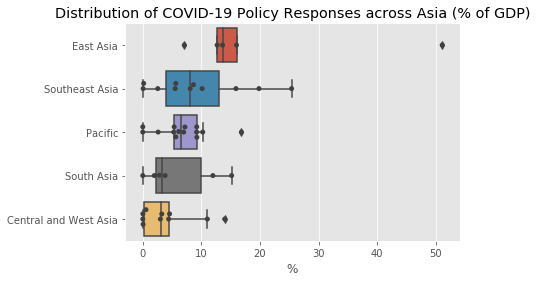

In [67]:
fig, ax = plt.subplots()

sns.boxplot(x=df2.reset_index(level=0)['pkg_gdp'], 
            y=df2.reset_index(level=0)['region'],
            order=['East Asia', 'Southeast Asia', 'Pacific', 'South Asia', 'Central and West Asia'])
sns.swarmplot(x=df2.reset_index(level=0)['pkg_gdp'], 
              y=df2.reset_index(level=0)['region'],
              order=['East Asia', 'Southeast Asia', 'Pacific', 'South Asia', 'Central and West Asia'],
              color=".25")

ax.set(title='Distribution of COVID-19 Policy Responses across Asia (% of GDP)',
       ylabel='', xlabel='%')

plt.show()

In [68]:
measures = [1, 2, 3, 4, 5, 9, 10]

m1 = df1[df1.measure_id.isin([measures[0]])].groupby(level=1).sum().loc[:, 'amount_usd']
m2 = df1[df1.measure_id.isin([measures[1]])].groupby(level=1).sum().loc[:, 'amount_usd']
m3 = df1[df1.measure_id.isin([measures[2]])].groupby(level=1).sum().loc[:, 'amount_usd']
m4 = df1[df1.measure_id.isin([measures[3]])].groupby(level=1).sum().loc[:, 'amount_usd']
m5 = df1[df1.measure_id.isin([measures[4]])].groupby(level=1).sum().loc[:, 'amount_usd']
m9 = df1[df1.measure_id.isin([measures[5]])].groupby(level=1).sum().loc[:, 'amount_usd']
m10 = df1[df1.measure_id.isin([measures[6]])].groupby(level=1).sum().loc[:, 'amount_usd']


In [69]:
pd.concat([m1, m2, m3, m4, m5, m9, m10], axis=1)

,amount_usd,amount_usd,amount_usd,amount_usd,amount_usd,amount_usd,amount_usd
country,,,,,,,
Afghanistan,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.016625e+08,0.000000e+00,0.000000e+00
Arab Republic of Egypt,0.000000e+00,6.745160e+09,6.363358e+09,1.272672e+09,6.839337e+09,0.000000e+00,0.000000e+00
Argentina,5.466135e+09,4.940239e+08,5.596813e+08,0.000000e+00,2.166072e+09,0.000000e+00,2.130996e+09
Armenia,0.000000e+00,5.112384e+07,0.000000e+00,0.000000e+00,6.134861e+07,0.000000e+00,5.010136e+08
Australia,0.000000e+00,9.016100e+10,0.000000e+00,0.000000e+00,1.701714e+11,1.741040e+08,0.000000e+00
...,...,...,...,...,...,...,...
United Kingdom,2.955079e+10,1.238102e+11,3.095256e+08,0.000000e+00,1.941245e+11,1.857153e+08,4.095023e+11
United States,4.401370e+11,3.169695e+12,6.050000e+11,0.000000e+00,1.696042e+12,9.407794e+11,0.000000e+00
Uzbekistan,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.213240e+07,0.000000e+00,0.000000e+00


In [70]:
df3 = pd.concat([m1, m2, m3, m4, m5, m9, m10], axis=1)

In [71]:
df3.columns = ['m1', 'm2', 'm3', 'm4', 'm5', 'm9', 'm10']

In [72]:
df3

,m1,m2,m3,m4,m5,m9,m10
country,,,,,,,
Afghanistan,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.016625e+08,0.000000e+00,0.000000e+00
Arab Republic of Egypt,0.000000e+00,6.745160e+09,6.363358e+09,1.272672e+09,6.839337e+09,0.000000e+00,0.000000e+00
Argentina,5.466135e+09,4.940239e+08,5.596813e+08,0.000000e+00,2.166072e+09,0.000000e+00,2.130996e+09
Armenia,0.000000e+00,5.112384e+07,0.000000e+00,0.000000e+00,6.134861e+07,0.000000e+00,5.010136e+08
Australia,0.000000e+00,9.016100e+10,0.000000e+00,0.000000e+00,1.701714e+11,1.741040e+08,0.000000e+00
...,...,...,...,...,...,...,...
United Kingdom,2.955079e+10,1.238102e+11,3.095256e+08,0.000000e+00,1.941245e+11,1.857153e+08,4.095023e+11
United States,4.401370e+11,3.169695e+12,6.050000e+11,0.000000e+00,1.696042e+12,9.407794e+11,0.000000e+00
Uzbekistan,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.213240e+07,0.000000e+00,0.000000e+00


In [73]:
df2

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.593500e+09  1.525588e+09  8.019100e+10   
                      Georgia      5.334017e+09  1.754188e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.022064e+12  2.007842e+10  1.873280e+13   
                      Singapore    1.304455e+11  9.209001e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.234166   
                      Georgia      1.592500e+10    3731000.0  11.015312   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.627140   
                      Singapore    3.628180e+11    5638676.0  25.381875   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd  
region                country                    
Central and West Asia Afghanistan      2.734893  
                      Armenia        207.836264  
                      Azerbaijan     153.443672  
                      Georgia        470.165738  
                      Kazakhstan    1302.013047  
...                                         ...  
Southeast Asia        Philippines    188.261237  
                      Singapore    16331.849993  
                      Thailand      1211.199412  
                      Timor-Leste    200.319881  
                      Viet Nam       277.402247  

[79 rows x 7 columns]

In [74]:
df3 = df2.reset_index(level=0).join(df3)

In [75]:
df3

,region,amount_lcy,amount_usd,gdp_lcy,gdp_usd,popn,pkg_gdp,pkg_pc_usd,m1,m2,m3,m4,m5,m9,m10
country,,,,,,,,,,,,,,,
Afghanistan,Central and West Asia,8.000000e+09,1.016625e+08,1.502470e+12,1.873400e+10,37172386.0,0.542663,2.734893,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.016625e+08,0.000000e+00,0.000000e+00
Armenia,Central and West Asia,3.000000e+11,6.134861e+08,6.541000e+12,1.344400e+10,2951776.0,4.563271,207.836264,0.000000e+00,5.112384e+07,0.000000e+00,0.000000e+00,6.134861e+07,0.000000e+00,5.010136e+08
Azerbaijan,Central and West Asia,2.593500e+09,1.525588e+09,8.019100e+10,4.717100e+10,9942334.0,3.234166,153.443672,0.000000e+00,2.941176e+08,0.000000e+00,0.000000e+00,6.382353e+08,5.000000e+06,5.882353e+08
Georgia,Central and West Asia,5.334017e+09,1.754188e+09,4.474900e+10,1.592500e+10,3731000.0,11.015312,470.165738,1.600000e+08,3.058474e+08,0.000000e+00,0.000000e+00,1.123907e+09,0.000000e+00,1.644341e+08
Kazakhstan,Central and West Asia,9.810000e+12,2.379624e+10,6.543920e+13,1.703260e+11,18276499.0,13.970997,1302.013047,4.244997e+09,0.000000e+00,8.732565e+08,0.000000e+00,1.867799e+10,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Philippines,Southeast Asia,1.022064e+12,2.007842e+10,1.873280e+13,3.568140e+11,106651922.0,5.627140,188.261237,4.321895e+09,2.357397e+09,2.753833e+08,0.000000e+00,1.027523e+10,0.000000e+00,2.848522e+09
Singapore,Southeast Asia,1.304455e+11,9.209001e+10,4.980840e+11,3.628180e+11,5638676.0,25.381875,16331.849993,2.823862e+09,0.000000e+00,2.096717e+10,3.741617e+09,5.155736e+10,1.300000e+10,0.000000e+00
Thailand,Southeast Asia,2.700000e+12,8.409179e+10,1.692200e+13,5.291770e+11,69428524.0,15.891051,1211.199412,0.000000e+00,2.647334e+10,1.401530e+10,0.000000e+00,4.360315e+10,0.000000e+00,0.000000e+00


In [76]:
df3 = df3.assign(m1_pkg = lambda x: 100 * x.m1 / x.amount_usd)
df3 = df3.assign(m2_pkg = lambda x: 100 * x.m2 / x.amount_usd)
df3 = df3.assign(m3_pkg = lambda x: 100 * x.m3 / x.amount_usd)
df3 = df3.assign(m4_pkg = lambda x: 100 * x.m4 / x.amount_usd)
df3 = df3.assign(m5_pkg = lambda x: 100 * x.m5 / x.amount_usd)
df3 = df3.assign(m9_pkg = lambda x: 100 * x.m9 / x.amount_usd)
df3 = df3.assign(m10_pkg = lambda x: 100 * x.m10 / x.amount_usd)

df3 = df3.assign(m1_gdp = lambda x: 100 * x.m1 / x.gdp_usd)
df3 = df3.assign(m2_gdp = lambda x: 100 * x.m2 / x.gdp_usd)
df3 = df3.assign(m3_gdp = lambda x: 100 * x.m3 / x.gdp_usd)
df3 = df3.assign(m4_gdp = lambda x: 100 * x.m4 / x.gdp_usd)
df3 = df3.assign(m5_gdp = lambda x: 100 * x.m5 / x.gdp_usd)
df3 = df3.assign(m9_gdp = lambda x: 100 * x.m9 / x.gdp_usd)
df3 = df3.assign(m10_gdp = lambda x: 100 * x.m10 / x.gdp_usd)

In [77]:
df3

,region,amount_lcy,amount_usd,gdp_lcy,gdp_usd,popn,pkg_gdp,pkg_pc_usd,m1,m2,...,m5_pkg,m9_pkg,m10_pkg,m1_gdp,m2_gdp,m3_gdp,m4_gdp,m5_gdp,m9_gdp,m10_gdp
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Central and West Asia,8.000000e+09,1.016625e+08,1.502470e+12,1.873400e+10,37172386.0,0.542663,2.734893,0.000000e+00,0.000000e+00,...,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.542663,0.000000,0.000000
Armenia,Central and West Asia,3.000000e+11,6.134861e+08,6.541000e+12,1.344400e+10,2951776.0,4.563271,207.836264,0.000000e+00,5.112384e+07,...,10.000000,0.000000,81.666667,0.000000,0.380273,0.000000,0.000000,0.456327,0.000000,3.726671
Azerbaijan,Central and West Asia,2.593500e+09,1.525588e+09,8.019100e+10,4.717100e+10,9942334.0,3.234166,153.443672,0.000000e+00,2.941176e+08,...,41.835358,0.327742,38.557933,0.000000,0.623514,0.000000,0.000000,1.353025,0.010600,1.247027
Georgia,Central and West Asia,5.334017e+09,1.754188e+09,4.474900e+10,1.592500e+10,3731000.0,11.015312,470.165738,1.600000e+08,3.058474e+08,...,64.069910,0.000000,9.373798,1.004710,1.920549,0.000000,0.000000,7.057500,0.000000,1.032553
Kazakhstan,Central and West Asia,9.810000e+12,2.379624e+10,6.543920e+13,1.703260e+11,18276499.0,13.970997,1302.013047,4.244997e+09,0.000000e+00,...,78.491335,0.000000,0.000000,2.492278,0.000000,0.512697,0.000000,10.966022,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Philippines,Southeast Asia,1.022064e+12,2.007842e+10,1.873280e+13,3.568140e+11,106651922.0,5.627140,188.261237,4.321895e+09,2.357397e+09,...,51.175465,0.000000,14.186979,1.211246,0.660680,0.077178,0.000000,2.879715,0.000000,0.798321
Singapore,Southeast Asia,1.304455e+11,9.209001e+10,4.980840e+11,3.628180e+11,5638676.0,25.381875,16331.849993,2.823862e+09,0.000000e+00,...,55.985833,14.116623,0.000000,0.778314,0.000000,5.778978,1.031265,14.210254,3.583064,0.000000
Thailand,Southeast Asia,2.700000e+12,8.409179e+10,1.692200e+13,5.291770e+11,69428524.0,15.891051,1211.199412,0.000000e+00,2.647334e+10,...,51.851852,0.000000,0.000000,0.000000,5.002738,2.648509,0.000000,8.239804,0.000000,0.000000


In [78]:
df3 = df3.set_index('region', append=True).swaplevel()

In [79]:
df3

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.593500e+09  1.525588e+09  8.019100e+10   
                      Georgia      5.334017e+09  1.754188e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.022064e+12  2.007842e+10  1.873280e+13   
                      Singapore    1.304455e+11  9.209001e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.234166   
                      Georgia      1.592500e+10    3731000.0  11.015312   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.627140   
                      Singapore    3.628180e+11    5638676.0  25.381875   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd            m1            m2  \
region                country                                                 
Central and West Asia Afghanistan      2.734893  0.000000e+00  0.000000e+00   
                      Armenia        207.836264  0.000000e+00  5.112384e+07   
                      Azerbaijan     153.443672  0.000000e+00  2.941176e+08   
                      Georgia        470.165738  1.600000e+08  3.058474e+08   
                      Kazakhstan    1302.013047  4.244997e+09  0.000000e+00   
...                                         ...           ...           ...   
Southeast Asia        Philippines    188.261237  4.321895e+09  2.357397e+09   
                      Singapore    16331.849993  2.823862e+09  0.000000e+00   
                      Thailand      1211.199412  0.000000e+00  2.647334e+10   
                      Timor-Leste    200.319881  0.000000e+00  4.000000e+06   
                      Viet Nam       277.402247  0.000000e+00  0.000000e+00   

                                             m3  ...      m5_pkg     m9_pkg  \
region                country                    ...                          
Central and West Asia Afghanistan  0.000000e+00  ...  100.000000   0.000000   
                      Armenia      0.000000e+00  ...   10.000000   0.000000   
                      Azerbaijan   0.000000e+00  ...   41.835358   0.327742   
                      Georgia      0.000000e+00  ...   64.069910   0.000000   
                      Kazakhstan   8.732565e+08  ...   78.491335   0.000000   
...                                         ...  ...         ...        ...   
Southeast Asia        Philippines  2.753833e+08  ...   51.175465   0.000000   
                      Singapore    2.096717e+10  ...   55.985833  14.116623   
                      Thailand     1.401530e+10  ...   51.851852   0.000000   
                      Timor-Leste  0.000000e+00  ...   59.055118   0.000000   
                      Viet Nam     1.360017e+10  ...   48

In [80]:
df3 = df3.assign(m_others_gdp = lambda x: x.m9_gdp + x.m10_gdp)

In [81]:
df3 = df3.assign(m_others_pkg = lambda x: x.m9_pkg + x.m10_pkg)

In [82]:
df3

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.593500e+09  1.525588e+09  8.019100e+10   
                      Georgia      5.334017e+09  1.754188e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.022064e+12  2.007842e+10  1.873280e+13   
                      Singapore    1.304455e+11  9.209001e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.234166   
                      Georgia      1.592500e+10    3731000.0  11.015312   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.627140   
                      Singapore    3.628180e+11    5638676.0  25.381875   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd            m1            m2  \
region                country                                                 
Central and West Asia Afghanistan      2.734893  0.000000e+00  0.000000e+00   
                      Armenia        207.836264  0.000000e+00  5.112384e+07   
                      Azerbaijan     153.443672  0.000000e+00  2.941176e+08   
                      Georgia        470.165738  1.600000e+08  3.058474e+08   
                      Kazakhstan    1302.013047  4.244997e+09  0.000000e+00   
...                                         ...           ...           ...   
Southeast Asia        Philippines    188.261237  4.321895e+09  2.357397e+09   
                      Singapore    16331.849993  2.823862e+09  0.000000e+00   
                      Thailand      1211.199412  0.000000e+00  2.647334e+10   
                      Timor-Leste    200.319881  0.000000e+00  4.000000e+06   
                      Viet Nam       277.402247  0.000000e+00  0.000000e+00   

                                             m3  ...    m10_pkg    m1_gdp  \
region                country                    ...                        
Central and West Asia Afghanistan  0.000000e+00  ...   0.000000  0.000000   
                      Armenia      0.000000e+00  ...  81.666667  0.000000   
                      Azerbaijan   0.000000e+00  ...  38.557933  0.000000   
                      Georgia      0.000000e+00  ...   9.373798  1.004710   
                      Kazakhstan   8.732565e+08  ...   0.000000  2.492278   
...                                         ...  ...        ...       ...   
Southeast Asia        Philippines  2.753833e+08  ...  14.186979  1.211246   
                      Singapore    2.096717e+10  ...   0.000000  0.778314   
                      Thailand     1.401530e+10  ...   0.000000  0.000000   
                      Timor-Leste  0.000000e+00  ...  39.370079  0.000000   
                      Viet Nam     1.360017e+10  ...   0.000000  0.000000   

   

In [83]:
y = df3.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 

In [84]:
y.sum(axis=1)

country
Kazakhstan         100.0
Georgia            100.0
Armenia            100.0
Pakistan           100.0
Azerbaijan         100.0
Kyrgyz Republic    100.0
Afghanistan        100.0
Uzbekistan         100.0
Tajikistan         100.0
Turkmenistan         0.0
dtype: float64

In [85]:
y

,m1_pkg,m2_pkg,m3_pkg,m4_pkg,m5_pkg,m_others_pkg
country,,,,,,
Kazakhstan,17.838940,0.000000,3.669725,0.0,78.491335,0.000000
Georgia,9.121027,17.435265,0.000000,0.0,64.069910,9.373798
Armenia,0.000000,8.333333,0.000000,0.0,10.000000,81.666667
Pakistan,0.000000,11.671868,30.677178,0.0,57.650954,0.000000
Azerbaijan,0.000000,19.278967,0.000000,0.0,41.835358,38.885676
Kyrgyz Republic,87.500000,0.000000,0.000000,0.0,12.500000,0.000000
Afghanistan,0.000000,0.000000,0.000000,0.0,100.000000,0.000000
Uzbekistan,0.000000,0.000000,0.000000,0.0,100.000000,0.000000
Tajikistan,0.000000,0.000000,0.000000,0.0,100.000000,0.000000


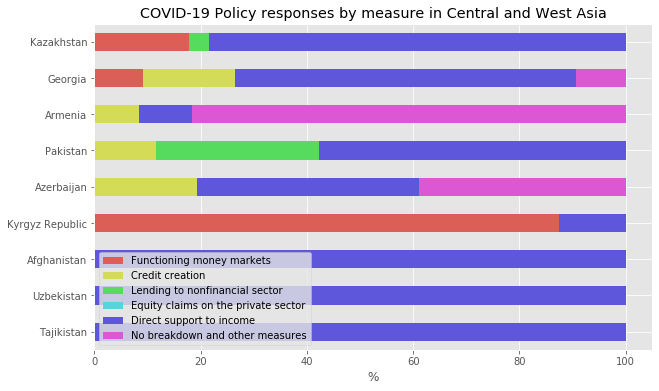

In [86]:
y = df3.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
ax = y.iloc[:-1, :].plot(kind='barh', stacked=True, figsize=(10, 6), 
                         colormap=ListedColormap(sns.color_palette("hls")))
ax.set_title('COVID-19 Policy responses by measure in Central and West Asia')
ax.invert_yaxis()
ax.set_ylabel('')
ax.set_xlabel('%')
ax.legend(['Functioning money markets', 'Credit creation', 'Lending to nonfinancial sector',
           'Equity claims on the private sector', 'Direct support to income',
           'No breakdown and other measures'])

plt.show()

In [87]:
y = df3.loc['East Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 

In [88]:
y

,m1_pkg,m2_pkg,m3_pkg,m4_pkg,m5_pkg,m_others_pkg
country,,,,,,
"Hong Kong, China",68.129119,3.407132,0.000000,1.318236,19.438905,7.706608
Mongolia,5.390748,5.781814,8.319056,0.000000,80.508382,0.000000
People's Republic of China,22.221981,11.951722,2.592564,1.481465,61.646738,0.105530
Republic of Korea,8.588146,0.119004,51.290870,4.244488,15.867245,19.890246
"Taipei,China",16.000000,0.000000,0.000000,0.000000,16.800000,67.200000


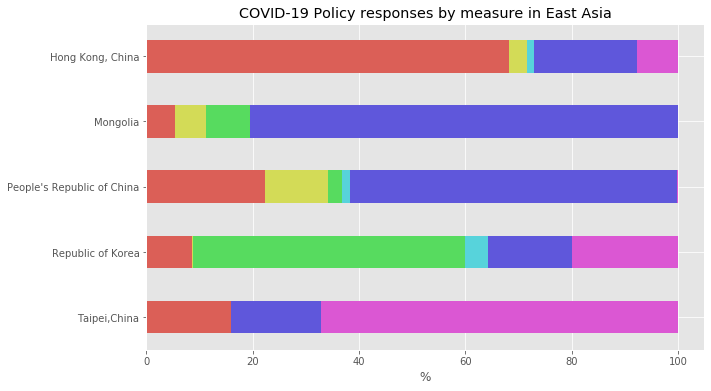

In [89]:
y = df3.loc['East Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
ax = y.plot(kind='barh', stacked=True, figsize=(10, 6), 
            colormap=ListedColormap(sns.color_palette("hls")),
            legend=None)
ax.set_title('COVID-19 Policy responses by measure in East Asia')
ax.invert_yaxis()
ax.set_ylabel('')
ax.set_xlabel('%')

plt.show()

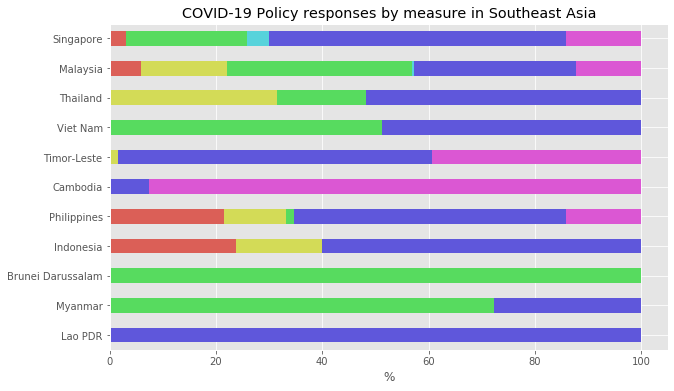

In [90]:
y = df3.loc['Southeast Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
ax = y.plot(kind='barh', stacked=True, figsize=(10, 6), 
            colormap=ListedColormap(sns.color_palette("hls")),
            legend=None)
ax.set_title('COVID-19 Policy responses by measure in Southeast Asia')
ax.invert_yaxis()
ax.set_ylabel('')
ax.set_xlabel('%')

plt.show()

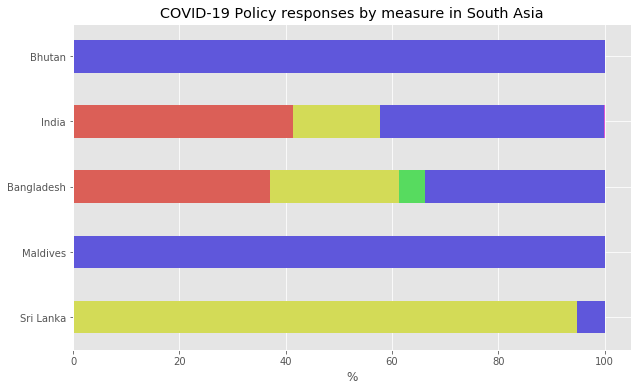

In [91]:
y = df3.loc['South Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
ax = y.plot(kind='barh', stacked=True, figsize=(10, 6), 
            colormap=ListedColormap(sns.color_palette("hls")),
            legend=None)
ax.set_title('COVID-19 Policy responses by measure in South Asia')
ax.invert_yaxis()
ax.set_ylabel('')
ax.set_xlabel('%')

plt.show()

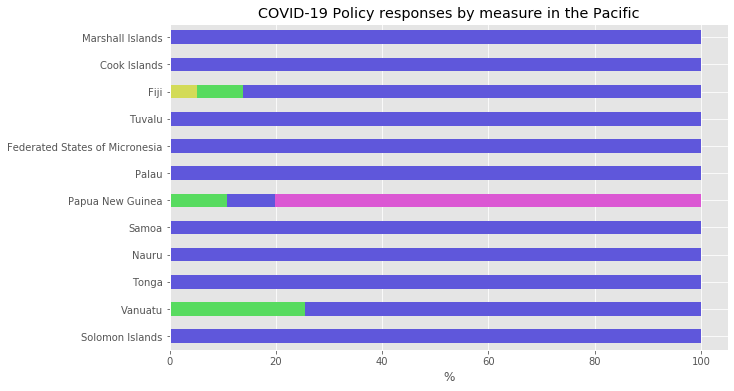

In [92]:
y = df3.loc['Pacific'].sort_values(by='pkg_gdp', ascending=False).iloc[:-2, list(range(14, 19)) + [29]] 
ax = y.plot(kind='barh', stacked=True, figsize=(10, 6), 
            colormap=ListedColormap(sns.color_palette("hls")),
            legend=None)
ax.set_title('COVID-19 Policy responses by measure in the Pacific')
ax.invert_yaxis()
ax.set_ylabel('')
ax.set_xlabel('%')

plt.show()

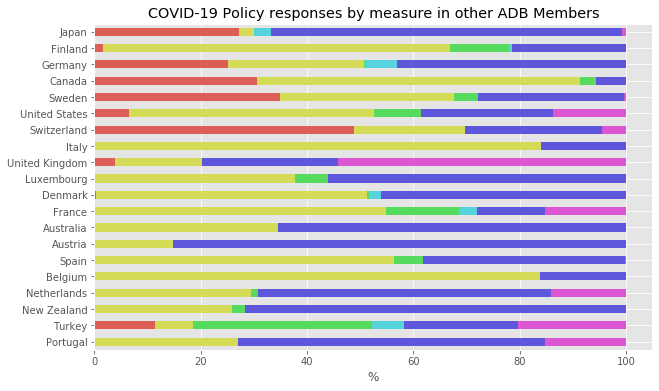

In [93]:
y = df3.loc['Other ADB Members'].sort_values(by='pkg_gdp', ascending=False).iloc[:-2, list(range(14, 19)) + [29]] 
ax = y.plot(kind='barh', stacked=True, figsize=(10, 6), 
            colormap=ListedColormap(sns.color_palette("hls")),
            legend=None)
ax.set_title('COVID-19 Policy responses by measure in other ADB Members')
ax.invert_yaxis()
ax.set_ylabel('')
ax.set_xlabel('%')

plt.show()

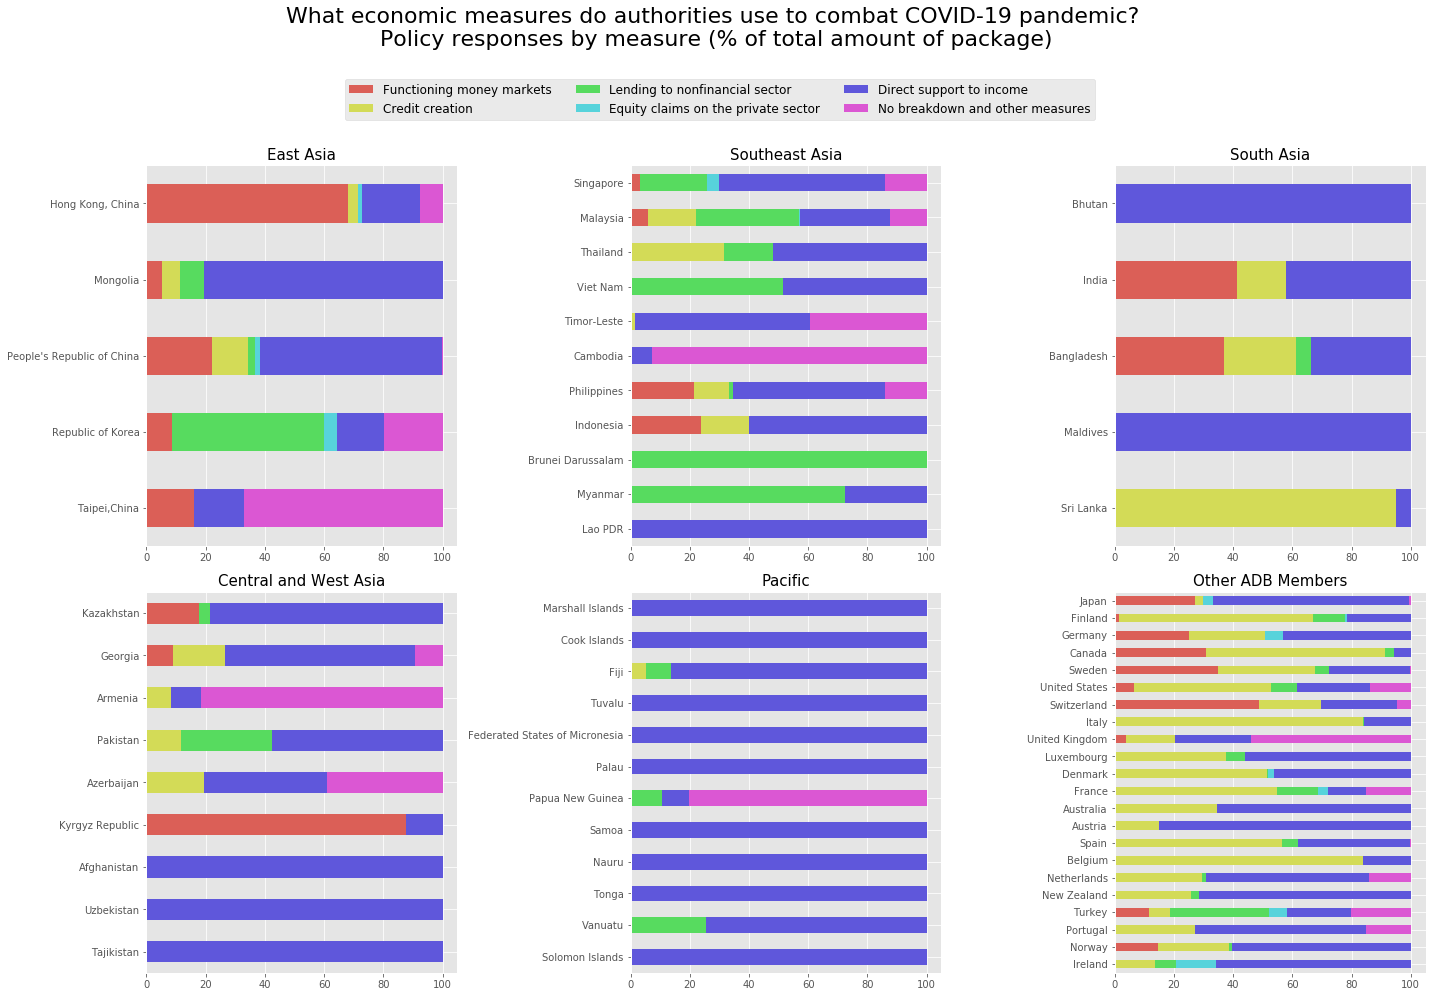

In [94]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

y = df3.loc['East Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 0], legend=None)
axs[0, 0].set_title('East Asia', fontsize=15)
axs[0, 0].invert_yaxis()
axs[0, 0].set_ylabel('')

y = df3.loc['Southeast Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 1], legend=None)
axs[0, 1].set_title('Southeast Asia', fontsize=15)
axs[0, 1].invert_yaxis()
axs[0, 1].set_ylabel('')

y = df3.loc['South Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 2], legend=None)
axs[0, 2].set_title('South Asia', fontsize=15)
axs[0, 2].invert_yaxis()
axs[0, 2].set_ylabel('')

y = df3.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 0], legend=None)
axs[1, 0].set_title('Central and West Asia', fontsize=15)
axs[1, 0].invert_yaxis()
axs[1, 0].set_ylabel('')

y = df3.loc['Pacific'].sort_values(by='pkg_gdp', ascending=False).iloc[:-2, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 1], legend=None)
axs[1, 1].set_title('Pacific', fontsize=15)
axs[1, 1].invert_yaxis()
axs[1, 1].set_ylabel('')

y = df3.loc['Other ADB Members'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 2], legend=None)
axs[1, 2].set_title('Other ADB Members', fontsize=15)
axs[1, 2].invert_yaxis()
axs[1, 2].set_ylabel('')


fig.legend(['Functioning money markets', 'Credit creation', 'Lending to nonfinancial sector',
           'Equity claims on the private sector', 'Direct support to income',
           'No breakdown and other measures'],
           loc='upper center', bbox_to_anchor=(0.5, 1.07), fontsize=12, ncol=3)
fig.suptitle('What economic measures do authorities use to combat COVID-19 pandemic? \nPolicy responses by measure (% of total amount of package)', 
             fontsize=22, y=1.15)

# plt.annotate('Source:', xy=(0.1, 0), xycoords='figure fraction',
#              xytext=(0.1, 10), textcoords='offset points',
#              ha="left", va="bottom")
plt.tight_layout()
plt.show()




# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')

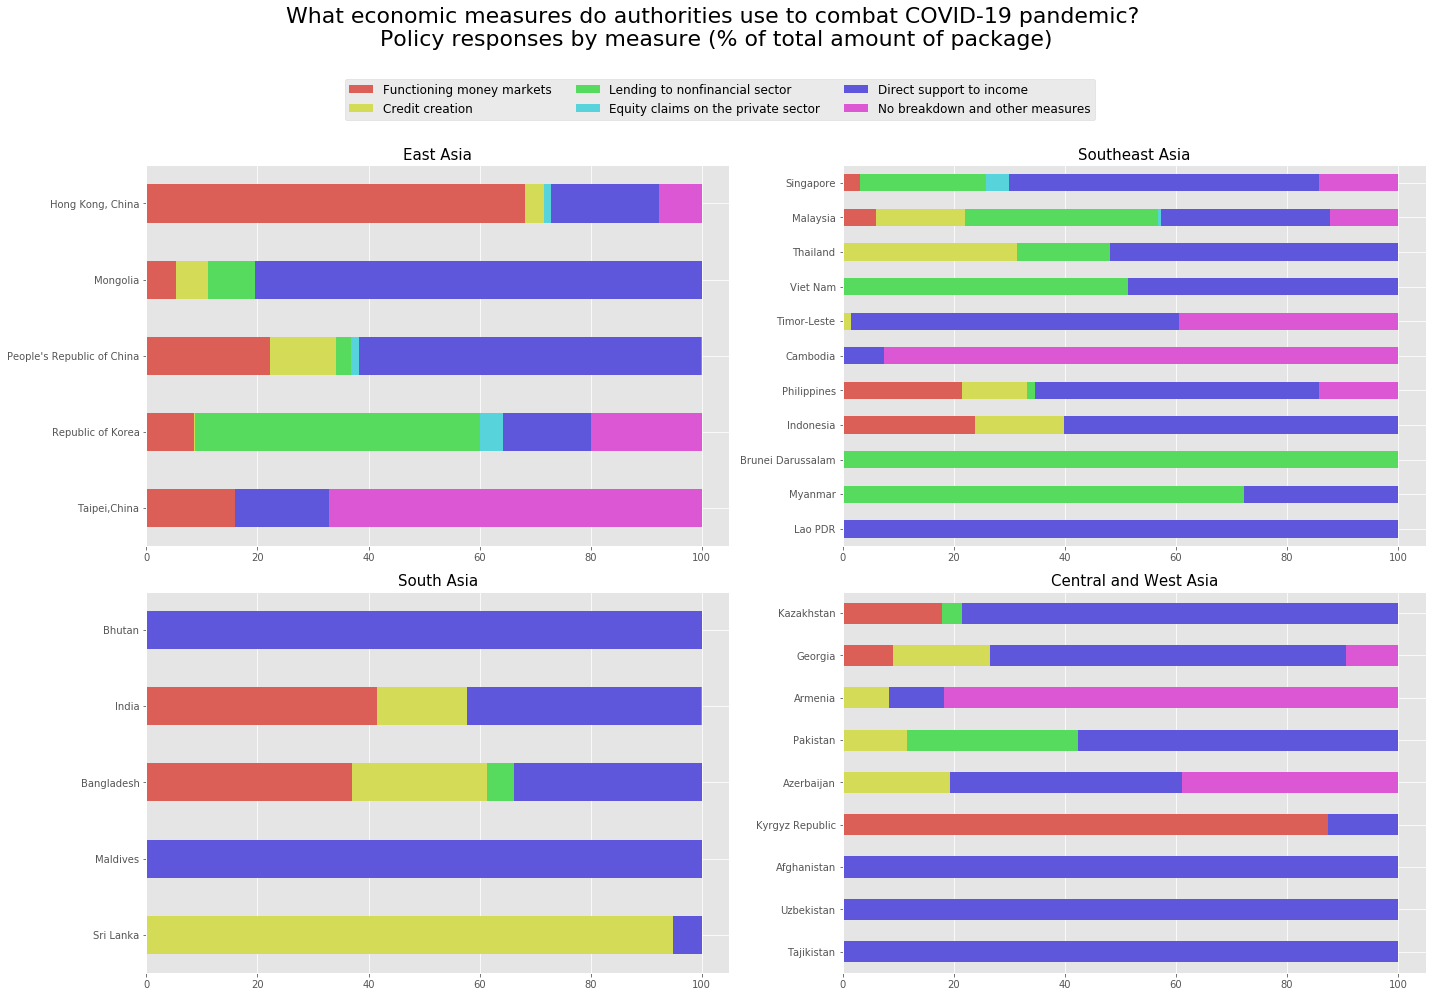

In [95]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

y = df3.loc['East Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 0], legend=None)
axs[0, 0].set_title('East Asia', fontsize=15)
axs[0, 0].invert_yaxis()
axs[0, 0].set_ylabel('')

y = df3.loc['Southeast Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 1], legend=None)
axs[0, 1].set_title('Southeast Asia', fontsize=15)
axs[0, 1].invert_yaxis()
axs[0, 1].set_ylabel('')

y = df3.loc['South Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 0], legend=None)
axs[1, 0].set_title('South Asia', fontsize=15)
axs[1, 0].invert_yaxis()
axs[1, 0].set_ylabel('')

y = df3.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 1], legend=None)
axs[1, 1].set_title('Central and West Asia', fontsize=15)
axs[1, 1].invert_yaxis()
axs[1, 1].set_ylabel('')

# y = df3.loc['Pacific'].sort_values(by='pkg_gdp', ascending=False).iloc[:-2, list(range(14, 19)) + [29]] 
# y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
#        ax=axs[1, 1], legend=None)
# axs[1, 1].set_title('Pacific', fontsize=15)
# axs[1, 1].invert_yaxis()
# axs[1, 1].set_ylabel('')

# y = df3.loc['Other ADB Members'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
# y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
#        ax=axs[1, 2], legend=None)
# axs[1, 2].set_title('Other ADB Members', fontsize=15)
# axs[1, 2].invert_yaxis()
# axs[1, 2].set_ylabel('')


fig.legend(['Functioning money markets', 'Credit creation', 'Lending to nonfinancial sector',
           'Equity claims on the private sector', 'Direct support to income',
           'No breakdown and other measures'],
           loc='upper center', bbox_to_anchor=(0.5, 1.07), fontsize=12, ncol=3)
fig.suptitle('What economic measures do authorities use to combat COVID-19 pandemic? \nPolicy responses by measure (% of total amount of package)', 
             fontsize=22, y=1.15)

# plt.annotate('Source:', xy=(0.1, 0), xycoords='figure fraction',
#              xytext=(0.1, 10), textcoords='offset points',
#              ha="left", va="bottom")
plt.tight_layout()
plt.show()




# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')

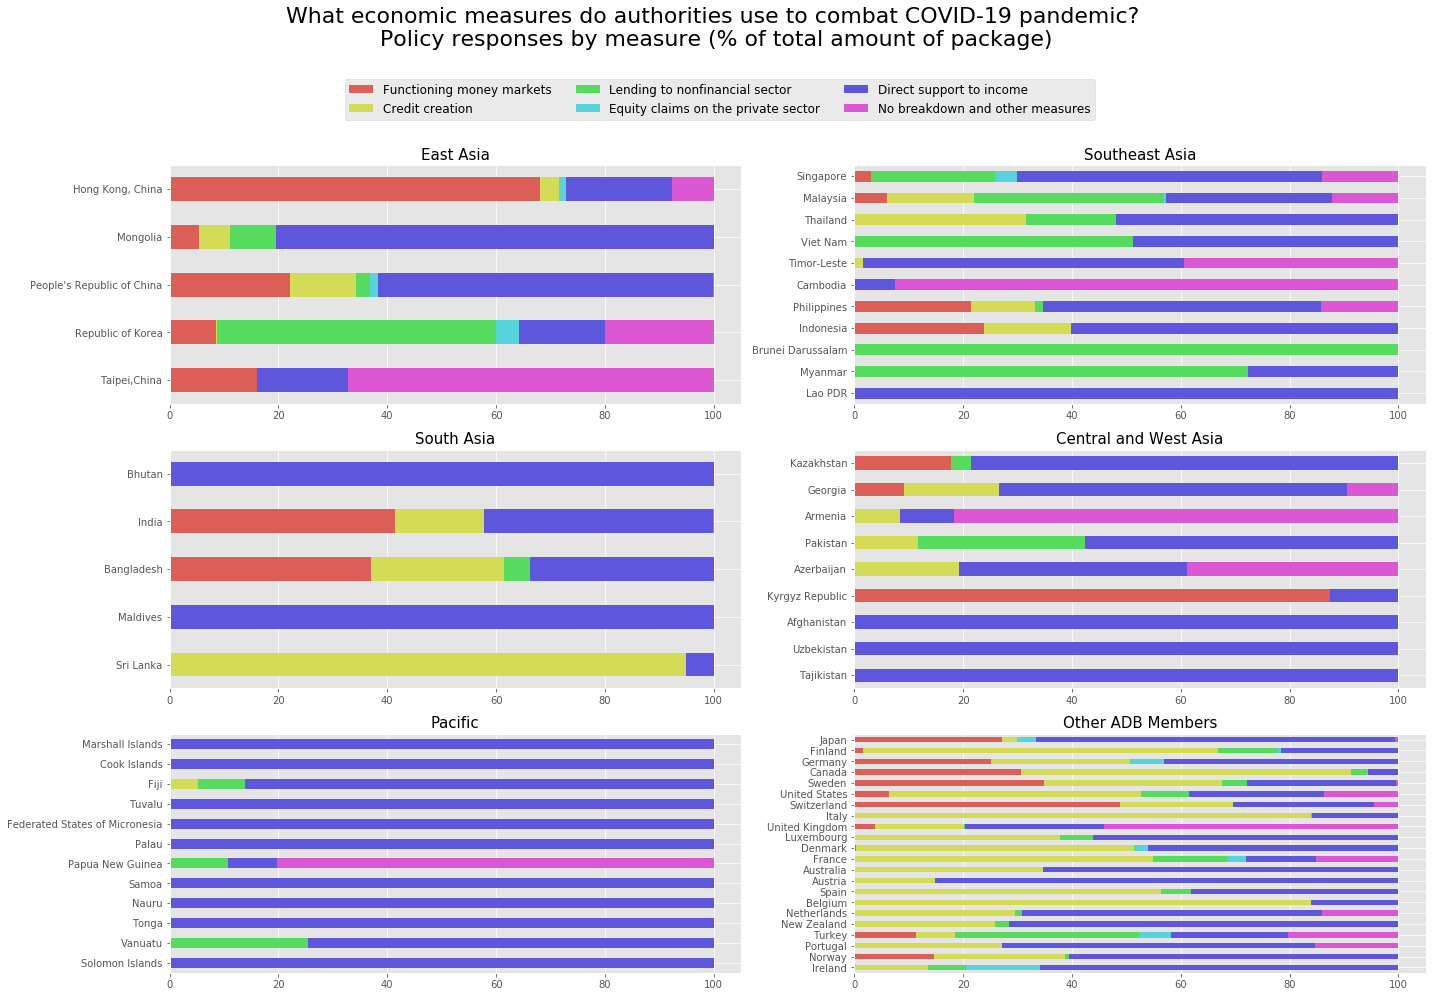

In [96]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))

y = df3.loc['East Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 0], legend=None)
axs[0, 0].set_title('East Asia', fontsize=15)
axs[0, 0].invert_yaxis()
axs[0, 0].set_ylabel('')

y = df3.loc['Southeast Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 1], legend=None)
axs[0, 1].set_title('Southeast Asia', fontsize=15)
axs[0, 1].invert_yaxis()
axs[0, 1].set_ylabel('')

y = df3.loc['South Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 0], legend=None)
axs[1, 0].set_title('South Asia', fontsize=15)
axs[1, 0].invert_yaxis()
axs[1, 0].set_ylabel('')

y = df3.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 1], legend=None)
axs[1, 1].set_title('Central and West Asia', fontsize=15)
axs[1, 1].invert_yaxis()
axs[1, 1].set_ylabel('')

y = df3.loc['Pacific'].sort_values(by='pkg_gdp', ascending=False).iloc[:-2, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[2, 0], legend=None)
axs[2, 0].set_title('Pacific', fontsize=15)
axs[2, 0].invert_yaxis()
axs[2, 0].set_ylabel('')

y = df3.loc['Other ADB Members'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[2, 1], legend=None)
axs[2, 1].set_title('Other ADB Members', fontsize=15)
axs[2, 1].invert_yaxis()
axs[2, 1].set_ylabel('')


fig.legend(['Functioning money markets', 'Credit creation', 'Lending to nonfinancial sector',
           'Equity claims on the private sector', 'Direct support to income',
           'No breakdown and other measures'],
           loc='upper center', bbox_to_anchor=(0.5, 1.07), fontsize=12, ncol=3)
fig.suptitle('What economic measures do authorities use to combat COVID-19 pandemic? \nPolicy responses by measure (% of total amount of package)', 
             fontsize=22, y=1.15)

# plt.annotate('Source:', xy=(0.1, 0), xycoords='figure fraction',
#              xytext=(0.1, 10), textcoords='offset points',
#              ha="left", va="bottom")
plt.tight_layout()
plt.show()




# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')

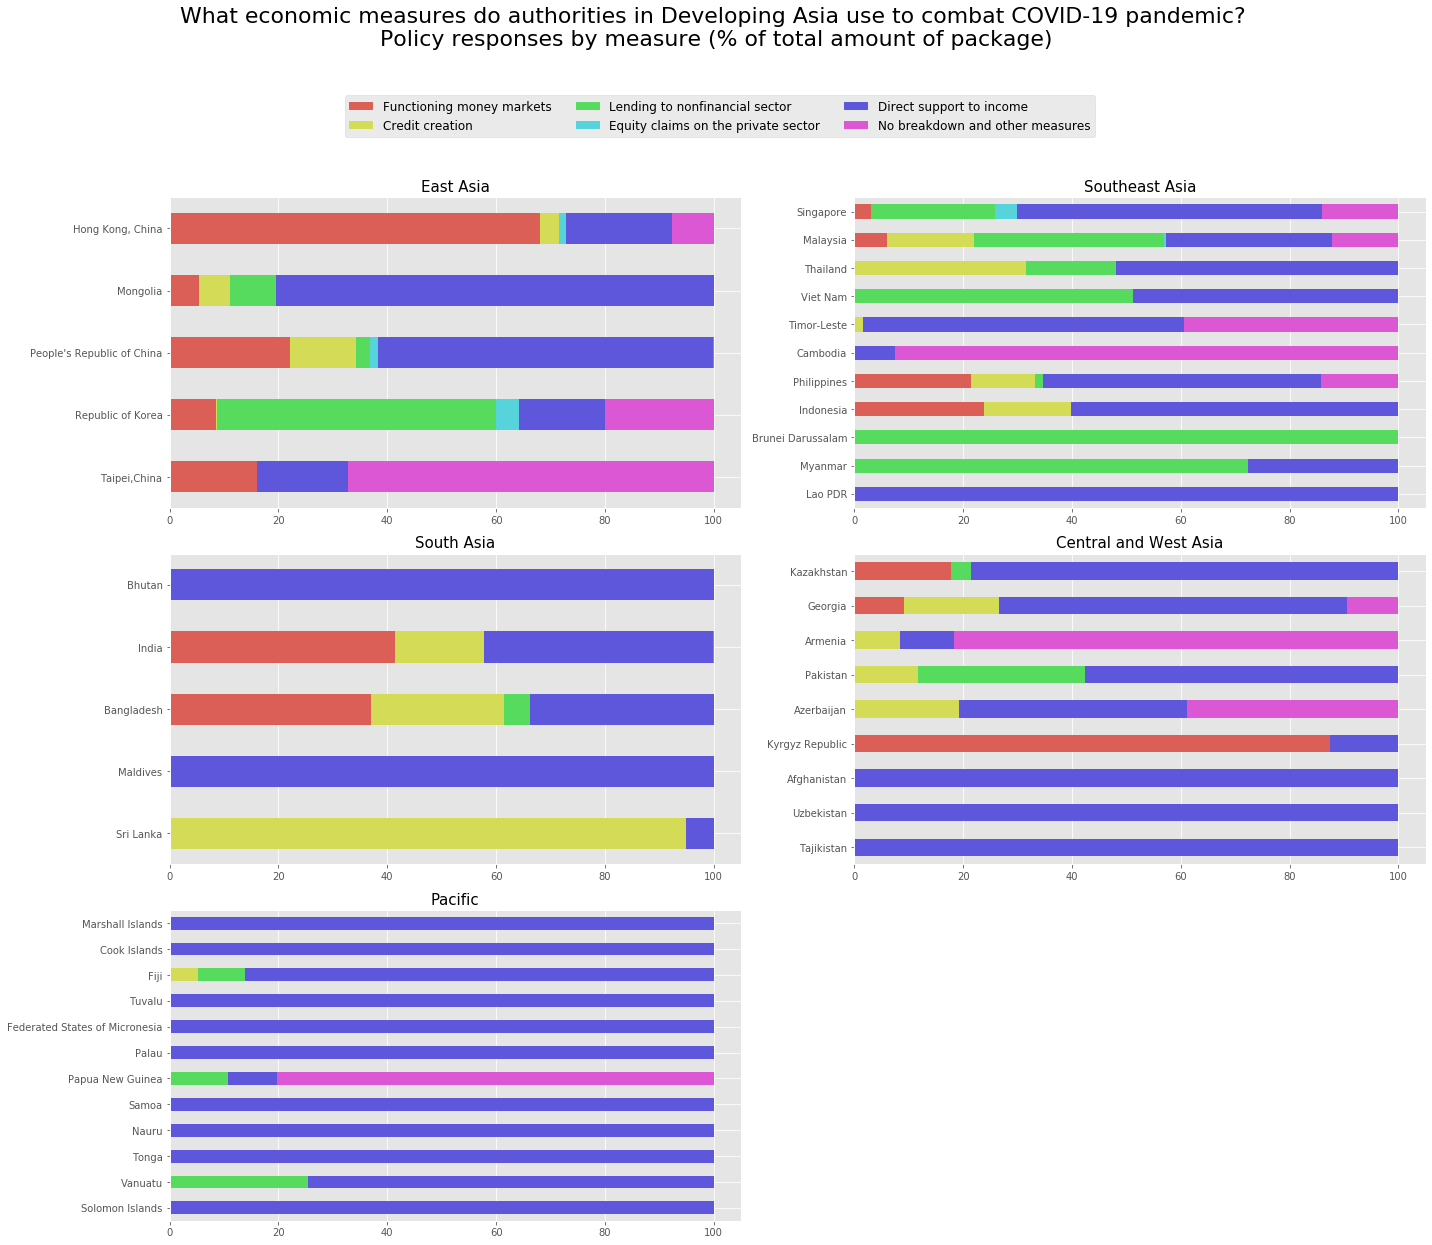

In [97]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

y = df3.loc['East Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 0], legend=None)
axs[0, 0].set_title('East Asia', fontsize=15)
axs[0, 0].invert_yaxis()
axs[0, 0].set_ylabel('')

y = df3.loc['Southeast Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 1], legend=None)
axs[0, 1].set_title('Southeast Asia', fontsize=15)
axs[0, 1].invert_yaxis()
axs[0, 1].set_ylabel('')

y = df3.loc['South Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 0], legend=None)
axs[1, 0].set_title('South Asia', fontsize=15)
axs[1, 0].invert_yaxis()
axs[1, 0].set_ylabel('')

y = df3.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 1], legend=None)
axs[1, 1].set_title('Central and West Asia', fontsize=15)
axs[1, 1].invert_yaxis()
axs[1, 1].set_ylabel('')

y = df3.loc['Pacific'].sort_values(by='pkg_gdp', ascending=False).iloc[:-2, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[2, 0], legend=None)
axs[2, 0].set_title('Pacific', fontsize=15)
axs[2, 0].invert_yaxis()
axs[2, 0].set_ylabel('')

axs[2,1].axis('off')

# y = df3.loc['Other ADB Members'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
# y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
#        ax=axs[2, 1], legend=None)
# axs[2, 1].set_title('Other ADB Members', fontsize=15)
# axs[2, 1].invert_yaxis()
# axs[2, 1].set_ylabel('')


fig.legend(['Functioning money markets', 'Credit creation', 'Lending to nonfinancial sector',
           'Equity claims on the private sector', 'Direct support to income',
           'No breakdown and other measures'],
           loc='upper center', bbox_to_anchor=(0.5, 1.07), fontsize=12, ncol=3)
fig.suptitle('What economic measures do authorities in Developing Asia use to combat COVID-19 pandemic? \nPolicy responses by measure (% of total amount of package)', 
             fontsize=22, y=1.15)

# plt.annotate('Source:', xy=(0, 0), xycoords='figure fraction',
#              xytext=(0, 0), textcoords='offset points',
#              ha="left", va="bottom")
plt.tight_layout()
plt.show()




# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')

In [133]:
df3

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.593500e+09  1.525588e+09  8.019100e+10   
                      Georgia      5.334017e+09  1.754188e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.022064e+12  2.007842e+10  1.873280e+13   
                      Singapore    1.304455e+11  9.209001e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.234166   
                      Georgia      1.592500e+10    3731000.0  11.015312   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.627140   
                      Singapore    3.628180e+11    5638676.0  25.381875   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd            m1            m2  \
region                country                                                 
Central and West Asia Afghanistan      2.734893  0.000000e+00  0.000000e+00   
                      Armenia        207.836264  0.000000e+00  5.112384e+07   
                      Azerbaijan     153.443672  0.000000e+00  2.941176e+08   
                      Georgia        470.165738  1.600000e+08  3.058474e+08   
                      Kazakhstan    1302.013047  4.244997e+09  0.000000e+00   
...                                         ...           ...           ...   
Southeast Asia        Philippines    188.261237  4.321895e+09  2.357397e+09   
                      Singapore    16331.849993  2.823862e+09  0.000000e+00   
                      Thailand      1211.199412  0.000000e+00  2.647334e+10   
                      Timor-Leste    200.319881  0.000000e+00  4.000000e+06   
                      Viet Nam       277.402247  0.000000e+00  0.000000e+00   

                                             m3  ...    m10_pkg    m1_gdp  \
region                country                    ...                        
Central and West Asia Afghanistan  0.000000e+00  ...   0.000000  0.000000   
                      Armenia      0.000000e+00  ...  81.666667  0.000000   
                      Azerbaijan   0.000000e+00  ...  38.557933  0.000000   
                      Georgia      0.000000e+00  ...   9.373798  1.004710   
                      Kazakhstan   8.732565e+08  ...   0.000000  2.492278   
...                                         ...  ...        ...       ...   
Southeast Asia        Philippines  2.753833e+08  ...  14.186979  1.211246   
                      Singapore    2.096717e+10  ...   0.000000  0.778314   
                      Thailand     1.401530e+10  ...   0.000000  0.000000   
                      Timor-Leste  0.000000e+00  ...  39.370079  0.000000   
                      Viet Nam     1.360017e+10  ...   0.000000  0.000000   

   

In [141]:
df3.groupby(level=1).mean().sort_values(by='pkg_gdp',ascending=False).loc[:, 'pkg_gdp']

country
Japan                    66.315194
Finland                  52.785605
Germany                  52.025802
Hong Kong, China         51.073839
Canada                   35.246530
                           ...    
Niue                      0.000000
Kiribati                  0.000000
Nepal                     0.000000
European Central Bank          NaN
European Union                 NaN
Name: pkg_gdp, Length: 79, dtype: float64

In [144]:
pkg_gdp = df3.groupby(level=1).mean().sort_values(by='pkg_gdp',ascending=False).loc[:, 'pkg_gdp']

In [147]:
pkg_gdp = pkg_gdp[pkg_gdp > 0]

In [148]:
pkg_gdp

country
Japan               66.315194
Finland             52.785605
Germany             52.025802
Hong Kong, China    51.073839
Canada              35.246530
                      ...    
Afghanistan          0.542663
Myanmar              0.149475
Lao PDR              0.054072
Uzbekistan           0.053120
Tajikistan           0.015376
Name: pkg_gdp, Length: 73, dtype: float64

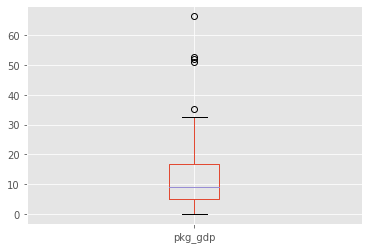

In [149]:
pkg_gdp.plot(kind='box')

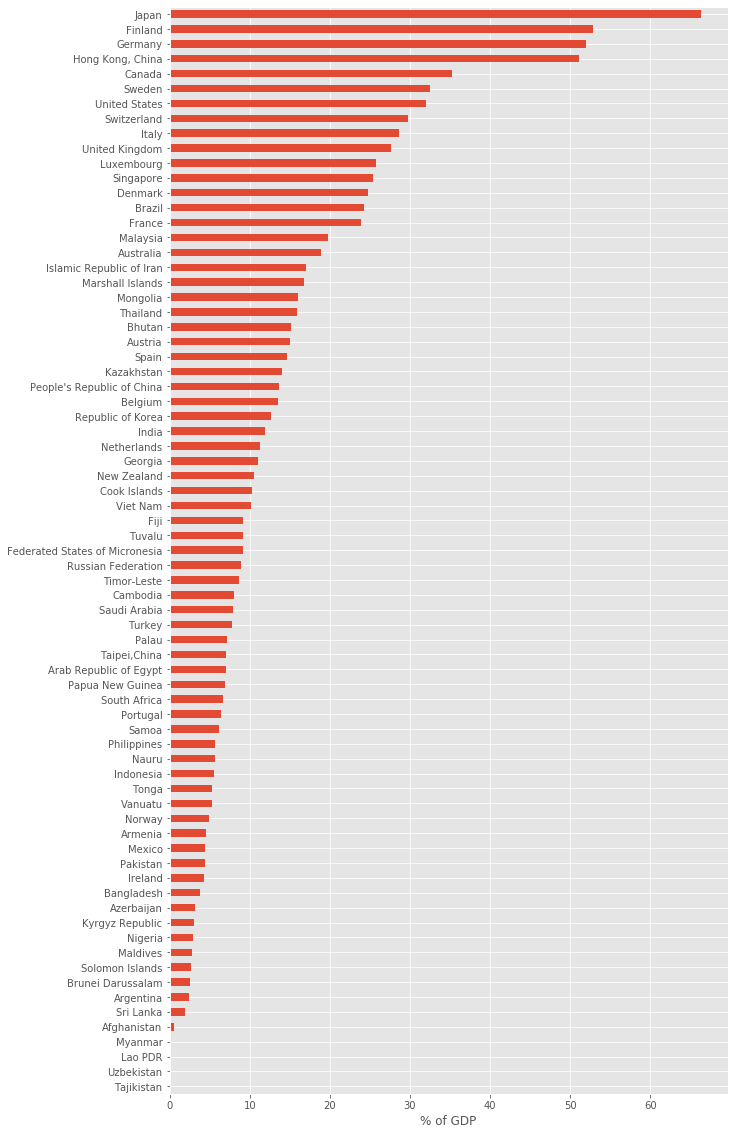

In [160]:
ax = pkg_gdp.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()
ax.set(ylabel='', xlabel='% of GDP')
plt.show()

In [182]:
pkg_usd = df3.groupby(level=1).mean().sort_values(by='amount_usd', ascending=False).loc[:, 'amount_usd']

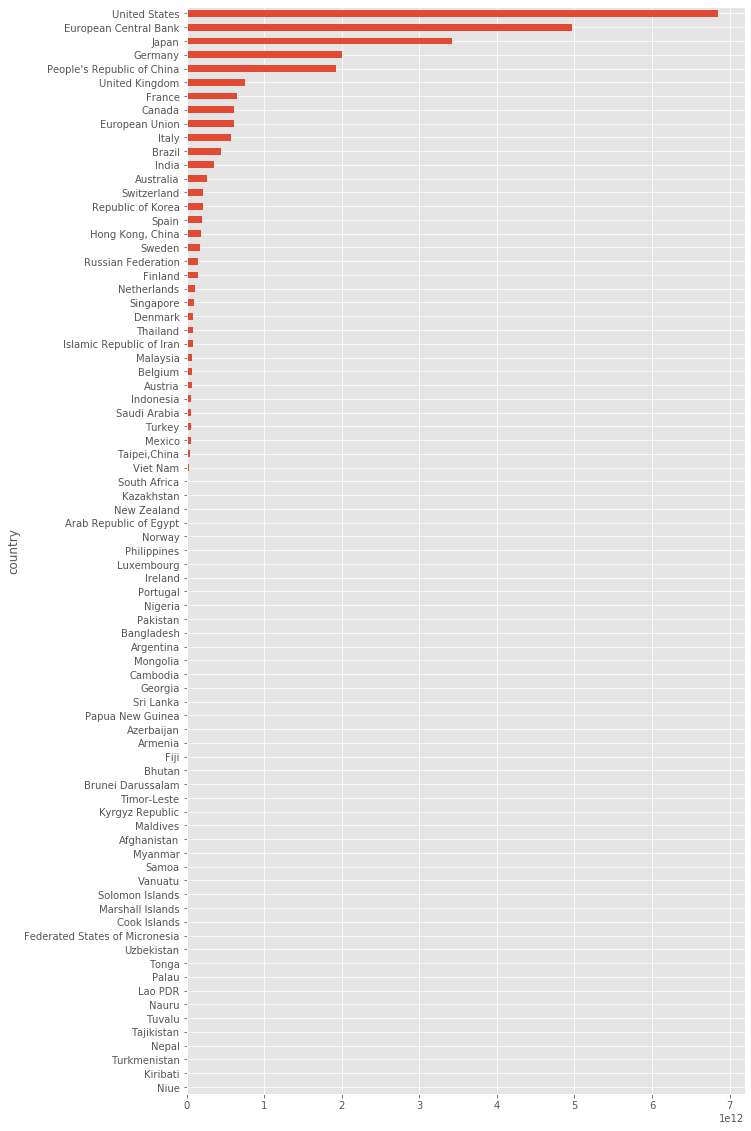

In [184]:
ax = pkg_usd.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()

In [185]:
pkg_gdp.index

Index(['Japan', 'Finland', 'Germany', 'Hong Kong, China', 'Canada', 'Sweden',
       'United States', 'Switzerland', 'Italy', 'United Kingdom', 'Luxembourg',
       'Singapore', 'Denmark', 'Brazil', 'France', 'Malaysia', 'Australia',
       'Islamic Republic of Iran', 'Marshall Islands', 'Mongolia', 'Thailand',
       'Bhutan', 'Austria', 'Spain', 'Kazakhstan',
       'People's Republic of China', 'Belgium', 'Republic of Korea', 'India',
       'Netherlands', 'Georgia', 'New Zealand', 'Cook Islands', 'Viet Nam',
       'Fiji', 'Tuvalu', 'Federated States of Micronesia',
       'Russian Federation', 'Timor-Leste', 'Cambodia', 'Saudi Arabia',
       'Turkey', 'Palau', 'Taipei,China', 'Arab Republic of Egypt',
       'Papua New Guinea', 'South Africa', 'Portugal', 'Samoa', 'Philippines',
       'Nauru', 'Indonesia', 'Tonga', 'Vanuatu', 'Norway', 'Armenia', 'Mexico',
       'Pakistan', 'Ireland', 'Bangladesh', 'Azerbaijan', 'Kyrgyz Republic',
       'Nigeria', 'Maldives', 'Solomon Islands'

In [186]:
pkg_usd.index

Index(['United States', 'European Central Bank', 'Japan', 'Germany',
       'People's Republic of China', 'United Kingdom', 'France', 'Canada',
       'European Union', 'Italy', 'Brazil', 'India', 'Australia',
       'Switzerland', 'Republic of Korea', 'Spain', 'Hong Kong, China',
       'Sweden', 'Russian Federation', 'Finland', 'Netherlands', 'Singapore',
       'Denmark', 'Thailand', 'Islamic Republic of Iran', 'Malaysia',
       'Belgium', 'Austria', 'Indonesia', 'Saudi Arabia', 'Turkey', 'Mexico',
       'Taipei,China', 'Viet Nam', 'South Africa', 'Kazakhstan', 'New Zealand',
       'Arab Republic of Egypt', 'Norway', 'Philippines', 'Luxembourg',
       'Ireland', 'Portugal', 'Nigeria', 'Pakistan', 'Bangladesh', 'Argentina',
       'Mongolia', 'Cambodia', 'Georgia', 'Sri Lanka', 'Papua New Guinea',
       'Azerbaijan', 'Armenia', 'Fiji', 'Bhutan', 'Brunei Darussalam',
       'Timor-Leste', 'Kyrgyz Republic', 'Maldives', 'Afghanistan', 'Myanmar',
       'Samoa', 'Vanuatu', 'Solomon

In [187]:
pkg_usd.index.isin(pkg_gdp.index)

array([ True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False])

In [188]:
mask = pkg_usd.index.isin(pkg_gdp.index)

In [189]:
pkg_usd = pkg_usd[mask]

In [190]:
pkg_usd

country
United States                 6.851653e+12
Japan                         3.418203e+12
Germany                       2.009934e+12
People's Republic of China    1.923626e+12
United Kingdom                7.574831e+11
                                  ...     
Palau                         2.091681e+07
Lao PDR                       1.034228e+07
Nauru                         6.072931e+06
Tuvalu                        3.863318e+06
Tajikistan                    1.253464e+06
Name: amount_usd, Length: 73, dtype: float64

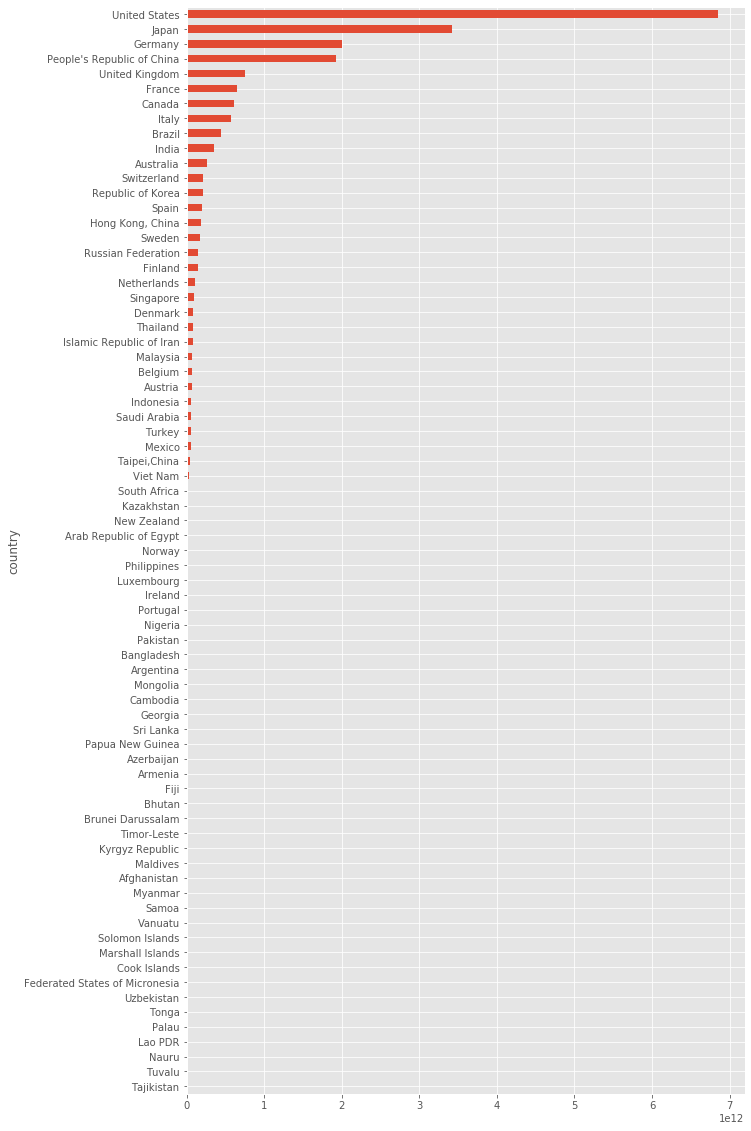

In [191]:
ax = pkg_usd.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()

In [192]:
m1_gdp = df3.groupby(level=1).mean().loc[:, 'm1_gdp'].sort_values(ascending=False)
m1_gdp = m1_gdp[m1_gdp > 0]

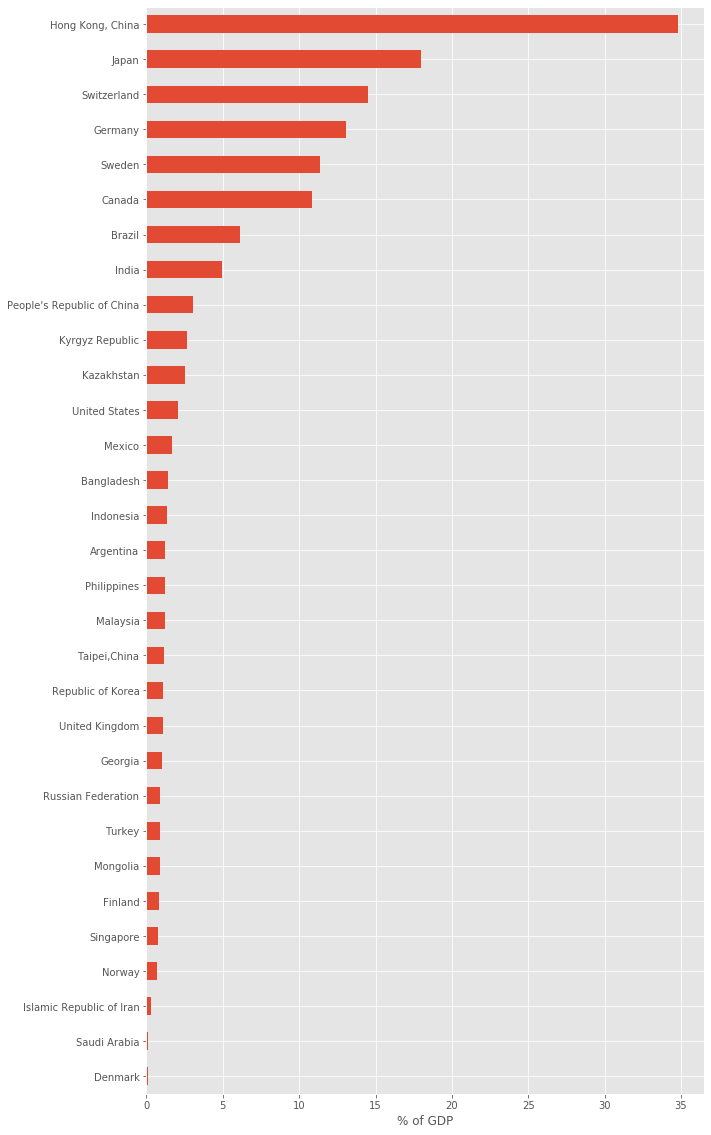

In [193]:
ax = m1_gdp.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()
ax.set(ylabel='', xlabel='% of GDP')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  


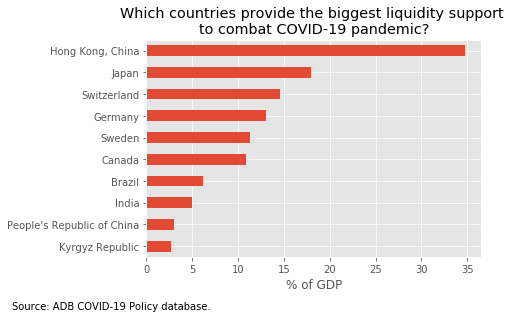

In [238]:
ax = m1_gdp.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries provide the biggest liquidity support \nto combat COVID-19 pandemic?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.4, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [256]:
mask = df3.reset_index(level=0)['region'].isin(['Other Economies', 'Other ADB Members', 'Others'])
df3.reset_index(level=0)[~mask]

,region,amount_lcy,amount_usd,gdp_lcy,gdp_usd,popn,pkg_gdp,pkg_pc_usd,m1,m2,...,m10_pkg,m1_gdp,m2_gdp,m3_gdp,m4_gdp,m5_gdp,m9_gdp,m10_gdp,m_others_gdp,m_others_pkg
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Central and West Asia,8.000000e+09,1.016625e+08,1.502470e+12,1.873400e+10,3.717239e+07,0.542663,2.734893,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.542663,0.000000,0.000000,0.000000,0.000000
Armenia,Central and West Asia,3.000000e+11,6.134861e+08,6.541000e+12,1.344400e+10,2.951776e+06,4.563271,207.836264,0.000000e+00,5.112384e+07,...,81.666667,0.000000,0.380273,0.000000,0.000000,0.456327,0.000000,3.726671,3.726671,81.666667
Azerbaijan,Central and West Asia,2.593500e+09,1.525588e+09,8.019100e+10,4.717100e+10,9.942334e+06,3.234166,153.443672,0.000000e+00,2.941176e+08,...,38.557933,0.000000,0.623514,0.000000,0.000000,1.353025,0.010600,1.247027,1.257627,38.885676
Georgia,Central and West Asia,5.334017e+09,1.754188e+09,4.474900e+10,1.592500e+10,3.731000e+06,11.015312,470.165738,1.600000e+08,3.058474e+08,...,9.373798,1.004710,1.920549,0.000000,0.000000,7.057500,0.000000,1.032553,1.032553,9.373798
Kazakhstan,Central and West Asia,9.810000e+12,2.379624e+10,6.543920e+13,1.703260e+11,1.827650e+07,13.970997,1302.013047,4.244997e+09,0.000000e+00,...,0.000000,2.492278,0.000000,0.512697,0.000000,10.966022,0.000000,0.000000,0.000000,0.000000
Kyrgyz Republic,Central and West Asia,1.850220e+10,2.480000e+08,5.856010e+11,8.261000e+09,6.315800e+06,3.002058,39.266601,2.170000e+08,0.000000e+00,...,0.000000,2.626801,0.000000,0.000000,0.000000,0.375257,0.000000,0.000000,0.000000,0.000000
Pakistan,Central and West Asia,2.081492e+12,1.254419e+10,3.855880e+13,2.842140e+11,2.122150e+08,4.413644,59.110771,0.000000e+00,1.464142e+09,...,0.000000,0.000000,0.515155,1.353981,0.000000,2.544508,0.000000,0.000000,0.000000,0.000000
Tajikistan,Central and West Asia,1.240000e+07,1.253464e+06,7.770500e+10,8.152000e+09,9.100837e+06,0.015376,0.137731,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.015376,0.000000,0.000000,0.000000,0.000000
Turkmenistan,Central and West Asia,0.000000e+00,0.000000e+00,1.633600e+11,4.667400e+10,5.850908e+06,0.000000,0.000000,0.000000e+00,0.000000e+00,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  # Remove the CWD from sys.path while we load stuff.


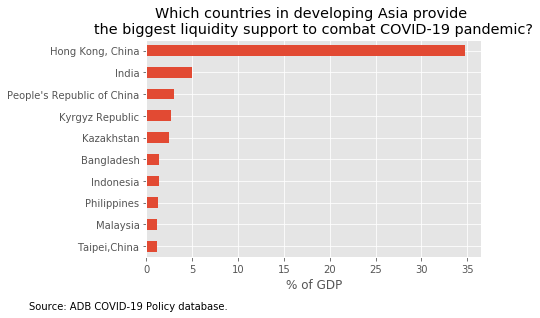

In [257]:
m1_gdp_asia = df3.reset_index(level=0)[~mask].loc[:, 'm1_gdp'].sort_values(ascending=False)
m1_gdp_asia = m1_gdp_asia[m1_gdp_asia > 0]
m1_gdp_asia

ax = m1_gdp_asia.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries in developing Asia provide \nthe biggest liquidity support to combat COVID-19 pandemic?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

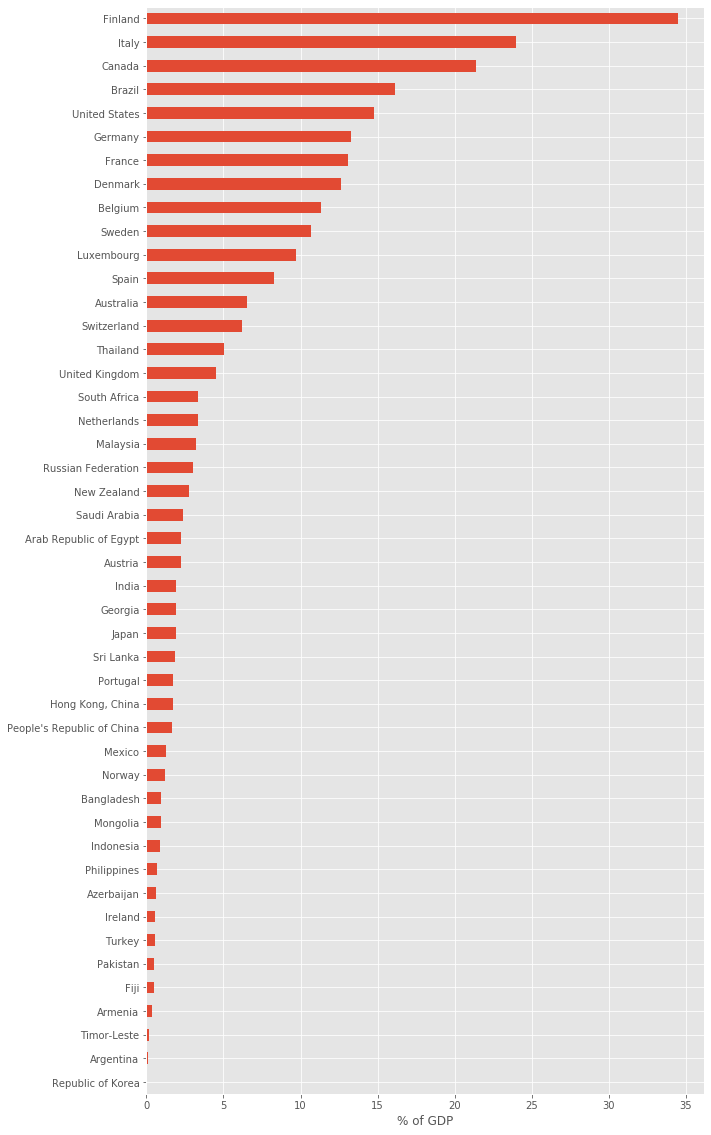

In [194]:
m2_gdp = df3.groupby(level=1).mean().loc[:, 'm2_gdp'].sort_values(ascending=False)
m2_gdp = m2_gdp[m2_gdp > 0]
ax = m2_gdp.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()
ax.set(ylabel='', xlabel='% of GDP')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  


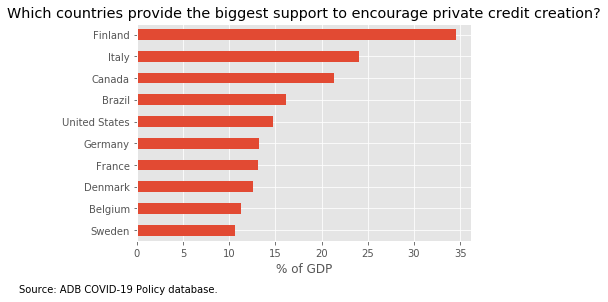

In [240]:
ax = m2_gdp.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries provide the biggest support to encourage private credit creation?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  # Remove the CWD from sys.path while we load stuff.


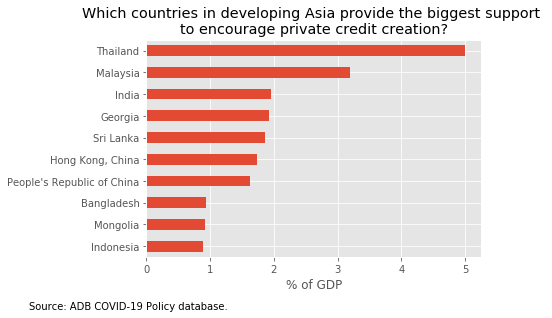

In [259]:
m2_gdp_asia = df3.reset_index(level=0)[~mask].loc[:, 'm2_gdp'].sort_values(ascending=False)
m2_gdp_asia = m2_gdp_asia[m2_gdp_asia > 0]
m2_gdp_asia

ax = m2_gdp_asia.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries in developing Asia provide the biggest support \nto encourage private credit creation?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

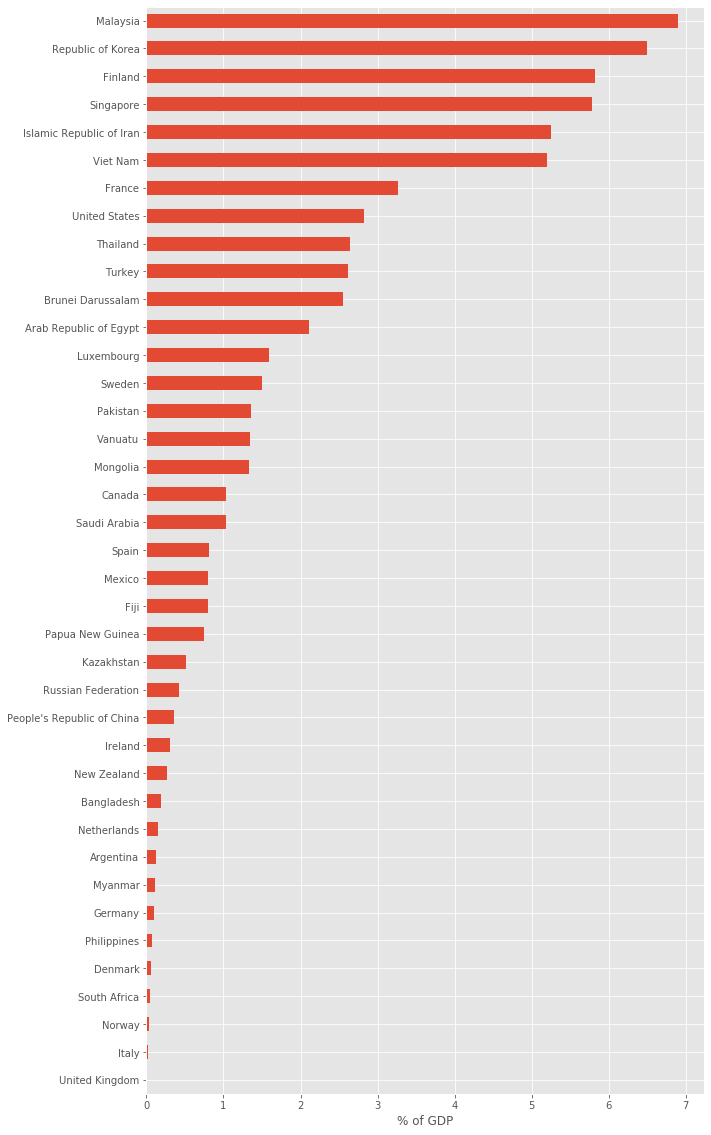

In [195]:
m3_gdp = df3.groupby(level=1).mean().loc[:, 'm3_gdp'].sort_values(ascending=False)
m3_gdp = m3_gdp[m3_gdp > 0]
ax = m3_gdp.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()
ax.set(ylabel='', xlabel='% of GDP')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  


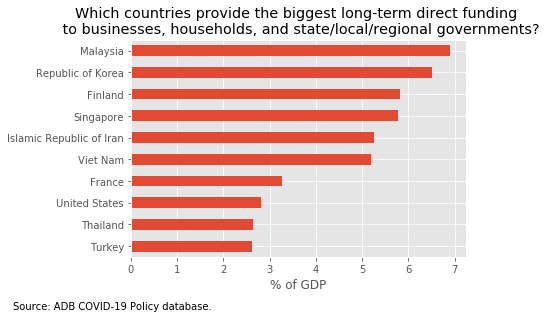

In [254]:
ax = m3_gdp.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries provide the biggest long-term direct funding \n to businesses, households, and state/local/regional governments?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
# plt.tight_layout()
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  # Remove the CWD from sys.path while we load stuff.


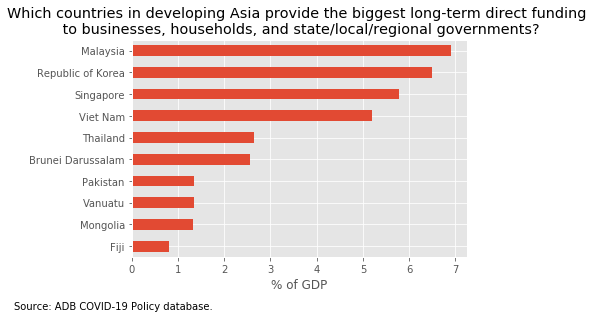

In [260]:
m3_gdp_asia = df3.reset_index(level=0)[~mask].loc[:, 'm3_gdp'].sort_values(ascending=False)
m3_gdp_asia = m3_gdp_asia[m3_gdp_asia > 0]
m3_gdp_asia

ax = m3_gdp_asia.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries in developing Asia provide the biggest long-term direct funding \n to businesses, households, and state/local/regional governments?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

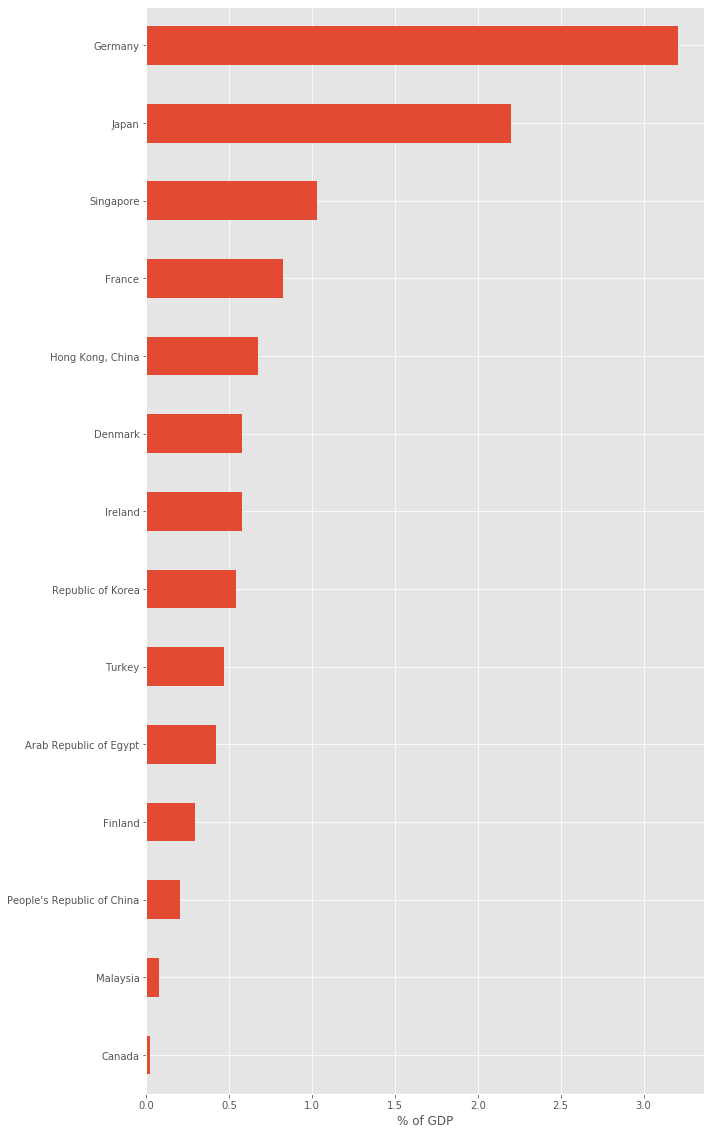

In [196]:
m4_gdp = df3.groupby(level=1).mean().loc[:, 'm4_gdp'].sort_values(ascending=False)
m4_gdp = m4_gdp[m4_gdp > 0]
ax = m4_gdp.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()
ax.set(ylabel='', xlabel='% of GDP')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  


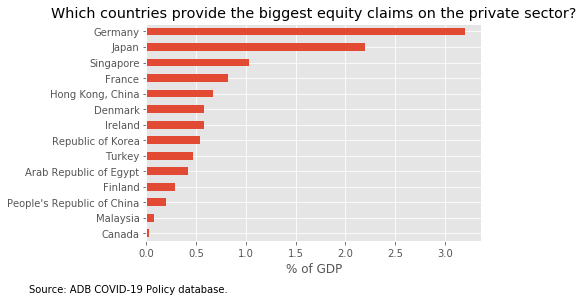

In [267]:
ax = m4_gdp.plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries provide the biggest equity claims on the private sector?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
# plt.tight_layout()
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  # Remove the CWD from sys.path while we load stuff.


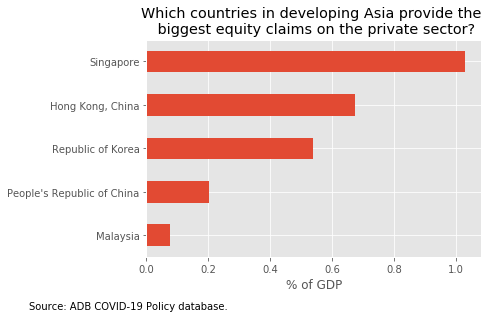

In [271]:
m4_gdp_asia = df3.reset_index(level=0)[~mask].loc[:, 'm4_gdp'].sort_values(ascending=False)
m4_gdp_asia = m4_gdp_asia[m4_gdp_asia > 0]
m4_gdp_asia

ax = m4_gdp_asia.plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries in developing Asia provide the \n biggest equity claims on the private sector?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

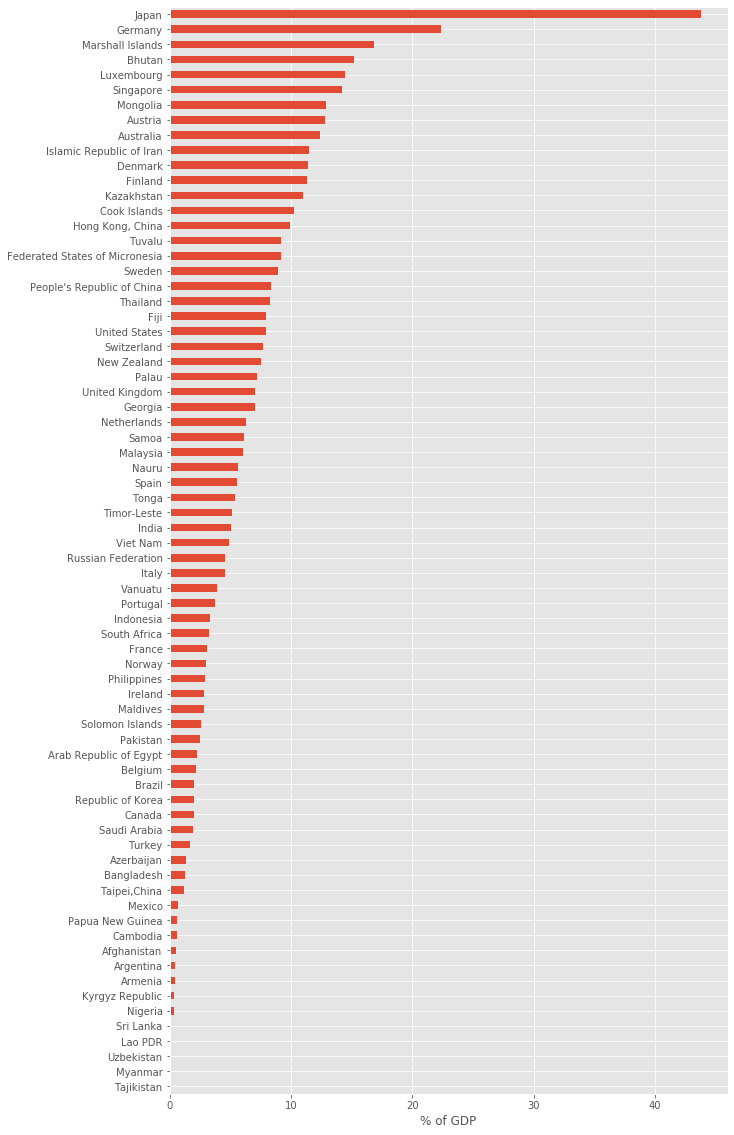

In [197]:
m5_gdp = df3.groupby(level=1).mean().loc[:, 'm5_gdp'].sort_values(ascending=False)
m5_gdp = m5_gdp[m5_gdp > 0]
ax = m5_gdp.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()
ax.set(ylabel='', xlabel='% of GDP')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  


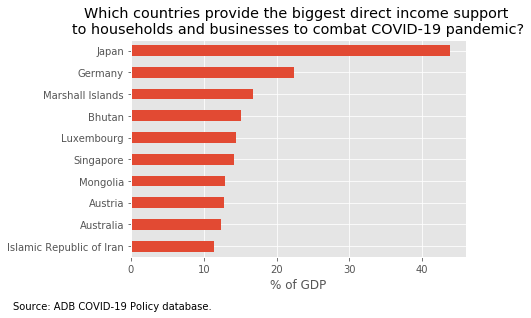

In [272]:
ax = m5_gdp.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries provide the biggest direct income support \nto households and businesses to combat COVID-19 pandemic?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  # Remove the CWD from sys.path while we load stuff.


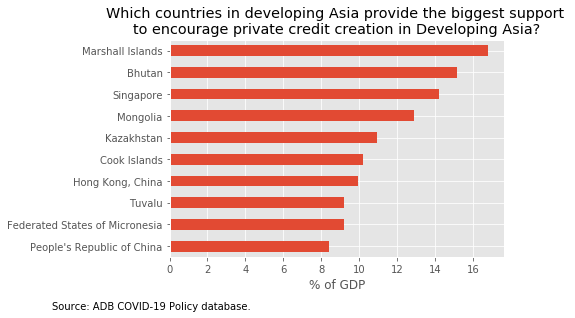

In [273]:
m5_gdp_asia = df3.reset_index(level=0)[~mask].loc[:, 'm5_gdp'].sort_values(ascending=False)
m5_gdp_asia = m5_gdp_asia[m5_gdp_asia > 0]
m5_gdp_asia

ax = m5_gdp_asia.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries in developing Asia provide the biggest support \nto encourage private credit creation in Developing Asia?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  # Remove the CWD from sys.path while we load stuff.


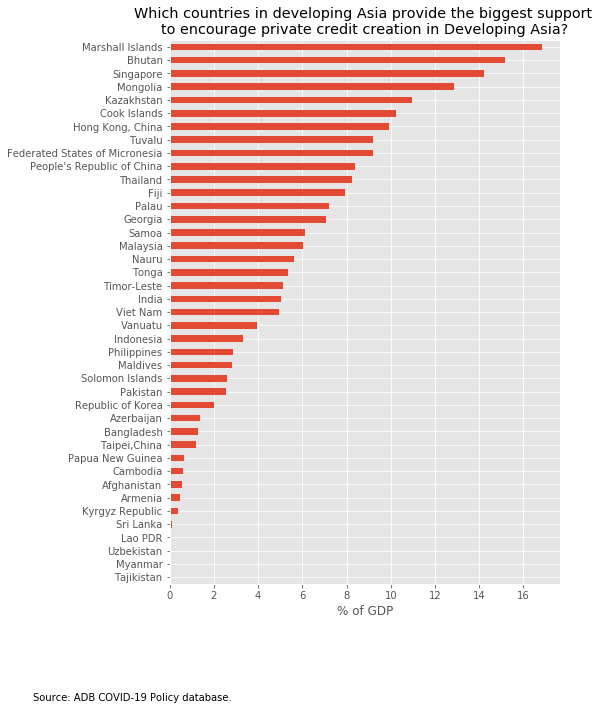

In [280]:
m5_gdp_asia = df3.reset_index(level=0)[~mask].loc[:, 'm5_gdp'].sort_values(ascending=False)
m5_gdp_asia = m5_gdp_asia[m5_gdp_asia > 0]
m5_gdp_asia

ax = m5_gdp_asia.plot(kind='barh', figsize=(7, 10))
ax.invert_yaxis()
ax.set(title='Which countries in developing Asia provide the biggest support \nto encourage private credit creation in Developing Asia?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

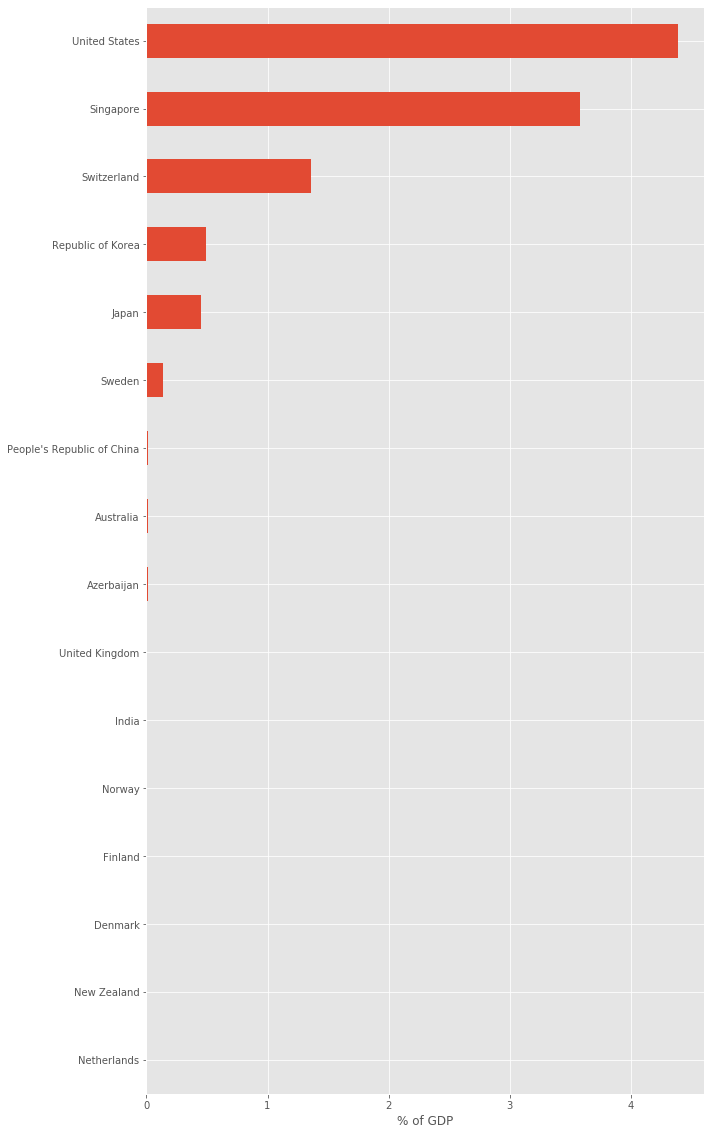

In [198]:
m9_gdp = df3.groupby(level=1).mean().loc[:, 'm9_gdp'].sort_values(ascending=False)
m9_gdp = m9_gdp[m9_gdp > 0]
ax = m9_gdp.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()
ax.set(ylabel='', xlabel='% of GDP')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  


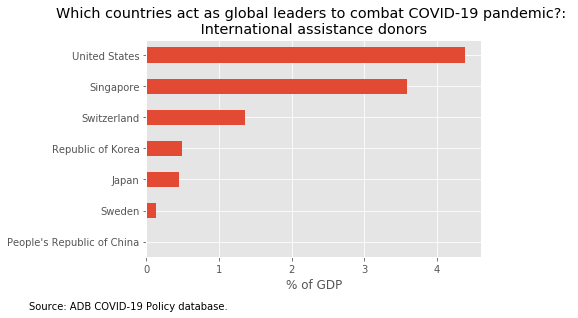

In [235]:
ax = m9_gdp.head(7).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries act as global leaders to combat COVID-19 pandemic?: \n International assistance donors ',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  # Remove the CWD from sys.path while we load stuff.


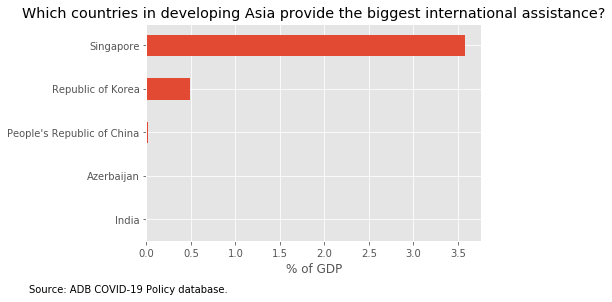

In [283]:
m9_gdp_asia = df3.reset_index(level=0)[~mask].loc[:, 'm9_gdp'].sort_values(ascending=False)
m9_gdp_asia = m9_gdp_asia[m9_gdp_asia > 0]
m9_gdp_asia

ax = m9_gdp_asia.plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries in developing Asia provide the biggest international assistance?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

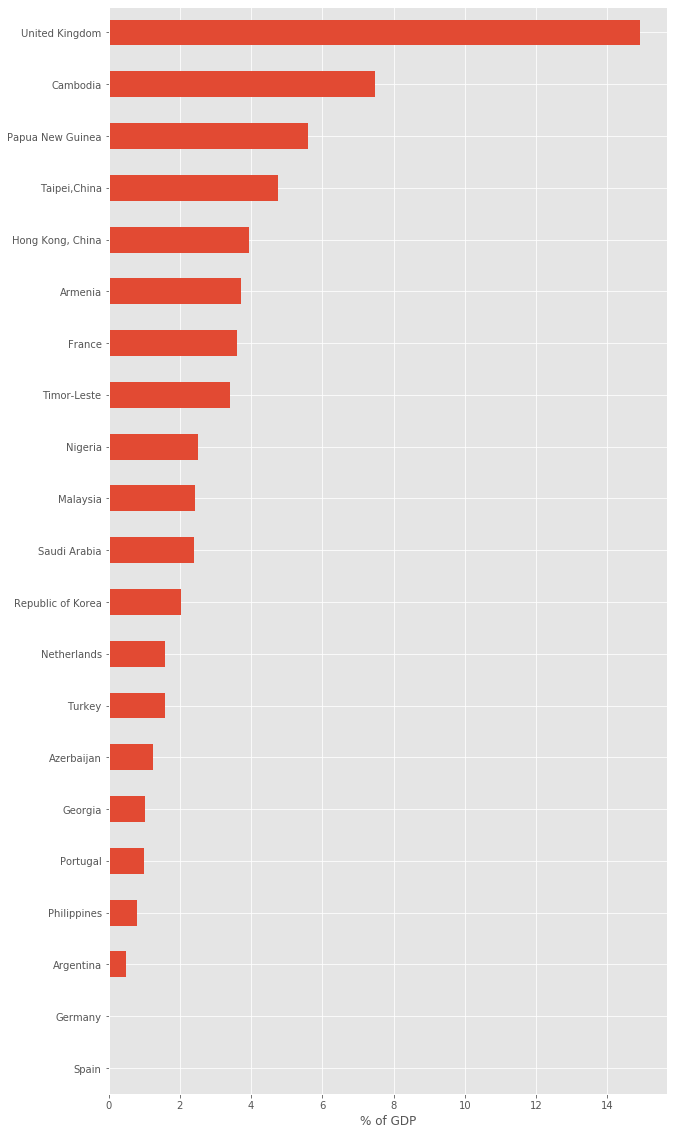

In [199]:
m10_gdp = df3.groupby(level=1).mean().loc[:, 'm10_gdp'].sort_values(ascending=False)
m10_gdp = m10_gdp[m10_gdp > 0]
ax = m10_gdp.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()
ax.set(ylabel='', xlabel='% of GDP')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  """


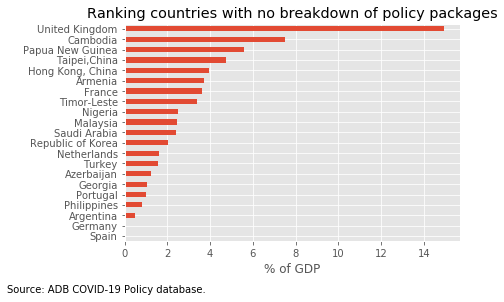

In [285]:
ax = m10_gdp.plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Ranking countries with no breakdown of policy packages',  ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [286]:
df3

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.593500e+09  1.525588e+09  8.019100e+10   
                      Georgia      5.334017e+09  1.754188e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.022064e+12  2.007842e+10  1.873280e+13   
                      Singapore    1.304455e+11  9.209001e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.234166   
                      Georgia      1.592500e+10    3731000.0  11.015312   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.627140   
                      Singapore    3.628180e+11    5638676.0  25.381875   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd            m1            m2  \
region                country                                                 
Central and West Asia Afghanistan      2.734893  0.000000e+00  0.000000e+00   
                      Armenia        207.836264  0.000000e+00  5.112384e+07   
                      Azerbaijan     153.443672  0.000000e+00  2.941176e+08   
                      Georgia        470.165738  1.600000e+08  3.058474e+08   
                      Kazakhstan    1302.013047  4.244997e+09  0.000000e+00   
...                                         ...           ...           ...   
Southeast Asia        Philippines    188.261237  4.321895e+09  2.357397e+09   
                      Singapore    16331.849993  2.823862e+09  0.000000e+00   
                      Thailand      1211.199412  0.000000e+00  2.647334e+10   
                      Timor-Leste    200.319881  0.000000e+00  4.000000e+06   
                      Viet Nam       277.402247  0.000000e+00  0.000000e+00   

                                             m3  ...    m10_pkg    m1_gdp  \
region                country                    ...                        
Central and West Asia Afghanistan  0.000000e+00  ...   0.000000  0.000000   
                      Armenia      0.000000e+00  ...  81.666667  0.000000   
                      Azerbaijan   0.000000e+00  ...  38.557933  0.000000   
                      Georgia      0.000000e+00  ...   9.373798  1.004710   
                      Kazakhstan   8.732565e+08  ...   0.000000  2.492278   
...                                         ...  ...        ...       ...   
Southeast Asia        Philippines  2.753833e+08  ...  14.186979  1.211246   
                      Singapore    2.096717e+10  ...   0.000000  0.778314   
                      Thailand     1.401530e+10  ...   0.000000  0.000000   
                      Timor-Leste  0.000000e+00  ...  39.370079  0.000000   
                      Viet Nam     1.360017e+10  ...   0.000000  0.000000   

   

In [287]:
df3.index.levels[0]

Index(['Central and West Asia', 'East Asia', 'Other ADB Members',
       'Other Economies', 'Others', 'Pacific', 'South Asia', 'Southeast Asia'],
      dtype='object', name='region')

In [288]:
df3.groupby(level=0).sum()

,amount_lcy,amount_usd,gdp_lcy,gdp_usd,popn,pkg_gdp,pkg_pc_usd,m1,m2,m3,...,m10_pkg,m1_gdp,m2_gdp,m3_gdp,m4_gdp,m5_gdp,m9_gdp,m10_gdp,m_others_gdp,m_others_pkg
region,,,,,,,,,,,,,,,,,,,,,
Central and West Asia,1.253293e+13,4.061675e+10,6.363661e+14,6.733910e+11,3.385120e+08,40.810606,2235.683744,4.621997e+09,2.115231e+09,4.721461e+09,...,129.598398,6.123788,3.439490,1.866679,0.000000,23.363799,0.010600,6.006251,6.016851,129.926141
East Asia,2.743313e+14,2.364410e+12,2.067429e+15,1.674246e+13,1.478575e+09,100.424500,33396.176320,5.817536e+11,2.367690e+11,1.560287e+11,...,90.940459,40.902611,4.305592,8.186286,1.412995,34.387977,0.503332,10.725707,11.229038,94.902384
Other ADB Members,3.820431e+14,1.632813e+13,6.132379e+14,4.818727e+13,1.015085e+09,538.485288,279311.293198,2.265820e+12,5.674782e+12,7.750977e+11,...,118.968506,73.413480,205.102567,20.429226,8.163474,202.285768,6.357145,22.733628,29.090773,138.551188
Other Economies,3.300433e+15,8.591522e+11,2.330315e+16,7.549986e+12,9.922108e+08,81.494673,7311.220042,1.571768e+11,4.009404e+11,5.624179e+10,...,137.709605,10.382028,28.460028,9.779218,0.421058,27.072253,0.000000,5.380089,5.380089,137.709605
Others,5.046988e+12,5.582951e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.106195e+10,4.995796e+12,2.820796e+11,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.455005
Pacific,1.334711e+10,2.479064e+09,2.162848e+11,3.469767e+10,1.108472e+07,93.791298,6389.260680,0.000000e+00,2.722817e+07,2.342255e+08,...,80.178571,0.000000,0.477018,2.882050,0.000000,84.845264,0.000000,5.586966,5.586966,80.178571
South Asia,2.746125e+13,3.653912e+11,2.556299e+14,3.378042e+12,1.565001e+09,35.684799,1298.881787,1.500588e+11,6.179337e+10,5.885815e+08,...,0.000000,6.368407,4.736497,0.185400,0.000000,24.389384,0.005110,0.000000,0.005110,0.042732
Southeast Asia,1.561823e+15,3.593955e+11,2.257556e+16,3.114703e+12,6.551682e+08,101.854370,21612.454164,2.611386e+10,5.034596e+10,7.444651e+10,...,158.383637,4.491562,9.873759,23.263149,1.107734,45.426326,3.583064,14.108777,17.691840,172.500260


In [289]:
regional_sum = df3.groupby(level=0).sum()

In [290]:
regional_sum = regional_sum.assign(m1_usd_region = lambda x: 100 * x.m1 / x.amount_usd)
regional_sum = regional_sum.assign(m2_usd_region = lambda x: 100 * x.m2 / x.amount_usd)
regional_sum = regional_sum.assign(m3_usd_region = lambda x: 100 * x.m3 / x.amount_usd)
regional_sum = regional_sum.assign(m4_usd_region = lambda x: 100 * x.m4 / x.amount_usd)
regional_sum = regional_sum.assign(m5_usd_region = lambda x: 100 * x.m5 / x.amount_usd)
regional_sum = regional_sum.assign(m9_usd_region = lambda x: 100 * x.m9 / x.amount_usd)
regional_sum = regional_sum.assign(m10_usd_region = lambda x: 100 * x.m10 / x.amount_usd)

In [299]:
regional_sum = regional_sum.assign(m9_m10_usd_region = lambda x: 100 * (x.m9 + x.m10) / x.amount_usd)

In [304]:
regional_sum.iloc[:, [30, 31, 32, 33, 34, 37]].sum(axis=1)

region
Central and West Asia    100.0
East Asia                100.0
Other ADB Members        100.0
Other Economies          100.0
Others                   100.0
Pacific                  100.0
South Asia               100.0
Southeast Asia           100.0
dtype: float64

In [293]:
regional_sum

,amount_lcy,amount_usd,gdp_lcy,gdp_usd,popn,pkg_gdp,pkg_pc_usd,m1,m2,m3,...,m10_gdp,m_others_gdp,m_others_pkg,m1_usd_region,m2_usd_region,m3_usd_region,m4_usd_region,m5_usd_region,m9_usd_region,m10_usd_region
region,,,,,,,,,,,,,,,,,,,,,
Central and West Asia,1.253293e+13,4.061675e+10,6.363661e+14,6.733910e+11,3.385120e+08,40.810606,2235.683744,4.621997e+09,2.115231e+09,4.721461e+09,...,6.006251,6.016851,129.926141,11.379536,5.207780,11.624420,0.000000,68.689338,0.012310,3.086616
East Asia,2.743313e+14,2.364410e+12,2.067429e+15,1.674246e+13,1.478575e+09,100.424500,33396.176320,5.817536e+11,2.367690e+11,1.560287e+11,...,10.725707,11.229038,94.902384,24.604597,10.013870,6.599055,1.682405,53.476057,0.422854,3.201162
Other ADB Members,3.820431e+14,1.632813e+13,6.132379e+14,4.818727e+13,1.015085e+09,538.485288,279311.293198,2.265820e+12,5.674782e+12,7.750977e+11,...,22.733628,29.090773,138.551188,13.876791,34.754639,4.747009,1.644752,35.719515,5.968968,3.288327
Other Economies,3.300433e+15,8.591522e+11,2.330315e+16,7.549986e+12,9.922108e+08,81.494673,7311.220042,1.571768e+11,4.009404e+11,5.624179e+10,...,5.380089,5.380089,137.709605,18.294408,46.666978,6.546196,0.148131,24.620885,0.000000,3.723402
Others,5.046988e+12,5.582951e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.106195e+10,4.995796e+12,2.820796e+11,...,0.000000,0.000000,4.455005,0.198138,89.483074,5.052518,0.010878,4.283723,0.971669,0.000000
Pacific,1.334711e+10,2.479064e+09,2.162848e+11,3.469767e+10,1.108472e+07,93.791298,6389.260680,0.000000e+00,2.722817e+07,2.342255e+08,...,5.586966,5.586966,80.178571,0.000000,1.098325,9.448142,0.000000,36.296469,0.000000,53.157064
South Asia,2.746125e+13,3.653912e+11,2.556299e+14,3.378042e+12,1.565001e+09,35.684799,1298.881787,1.500588e+11,6.179337e+10,5.885815e+08,...,0.000000,0.005110,0.042732,41.067981,16.911562,0.161083,0.000000,41.818323,0.041052,0.000000
Southeast Asia,1.561823e+15,3.593955e+11,2.257556e+16,3.114703e+12,6.551682e+08,101.854370,21612.454164,2.611386e+10,5.034596e+10,7.444651e+10,...,14.108777,17.691840,172.500260,7.266050,14.008509,20.714366,1.118812,49.433775,3.617185,3.841304


In [308]:
regional_sum.iloc[:, [30, 31, 32, 33, 34, 37]]

,m1_usd_region,m2_usd_region,m3_usd_region,m4_usd_region,m5_usd_region,m9_m10_usd_region
region,,,,,,
Central and West Asia,11.379536,5.207780,11.624420,0.000000,68.689338,3.098926
East Asia,24.604597,10.013870,6.599055,1.682405,53.476057,3.624016
Other ADB Members,13.876791,34.754639,4.747009,1.644752,35.719515,9.257294
Other Economies,18.294408,46.666978,6.546196,0.148131,24.620885,3.723402
Others,0.198138,89.483074,5.052518,0.010878,4.283723,0.971669
Pacific,0.000000,1.098325,9.448142,0.000000,36.296469,53.157064
South Asia,41.067981,16.911562,0.161083,0.000000,41.818323,0.041052
Southeast Asia,7.266050,14.008509,20.714366,1.118812,49.433775,7.458488


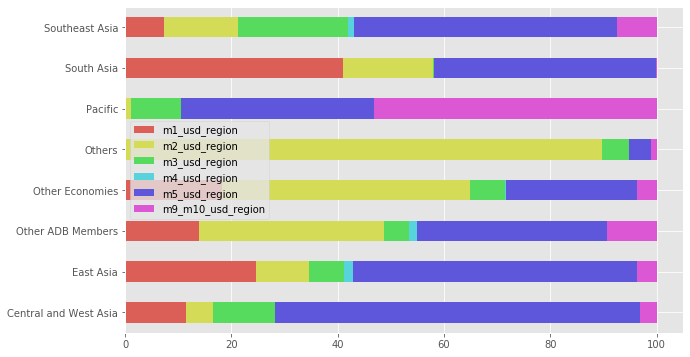

In [317]:
ax = regional_sum.iloc[:, [30, 31, 32, 33, 34, 37]]\
.plot(kind='barh', stacked=True, figsize=(10, 6),
      colormap=ListedColormap(sns.color_palette("hls", 6)))
ax.set(ylabel='')
plt.show()

In [99]:
mask = df3.index.levels[0].isin(['Other Economies', 'Other ADB Members', 'Others'])

In [100]:
y = df3.loc[df3.index.levels[0][~mask], :]

In [101]:
y

amount_lcy  \
region                country                                        
Central and West Asia Afghanistan                     8.000000e+09   
                      Armenia                         3.000000e+11   
                      Azerbaijan                      2.593500e+09   
                      Georgia                         5.334017e+09   
                      Kazakhstan                      9.810000e+12   
                      Kyrgyz Republic                 1.850220e+10   
                      Pakistan                        2.081492e+12   
                      Tajikistan                      1.240000e+07   
                      Turkmenistan                    0.000000e+00   
                      Uzbekistan                      3.070000e+11   
East Asia             Hong Kong, China                1.479250e+12   
                      Mongolia                        6.010297e+12   
                      People's Republic of China      1.350015e+13   
                      Republic of Korea               2.520916e+14   
                      Taipei,China                    1.250000e+12   
Pacific               Cook Islands                    6.100000e+07   
                      Federated States of Micronesia  3.500000e+07   
                      Fiji                            1.160000e+09   
                      Kiribati                        0.000000e+00   
                      Marshall Islands                3.700000e+07   
                      Nauru                           9.100000e+06   
                      Niue                            0.000000e+00   
                      Palau                           2.091681e+07   
                      Papua New Guinea                5.600000e+09   
                      Samoa                           1.493000e+08   
                      Solomon Islands                 3.090000e+08   
                      Tonga                           6.000000e+07   
                      Tuvalu                          5.789000e+06   
                      Vanuatu                         5.900000e+09   
South Asia            Bangladesh                      1.026065e+12   
                      Bhutan                          3.200000e+10   
                      India                           2.608667e+13   
                      Maldives                        2.500000e+09   
                      Nepal                           0.000000e+00   
                      Sri Lanka                       3.140121e+11   
Southeast Asia        Brunei Darussalam               4.500000e+08   
                      Cambodia                        8.760469e+12   
                      Indonesia                       9.328678e+14   
                      Lao PDR                         9.200000e+10   
                      Malaysia                        3.110000e+11   
                      Myanmar                         1.383000e+11   
                      Philippines                     1.022064e+12   
                      Singapore                       1.304455e+11   
                      Thailand                        2.700000e+12   
                      Timor-Leste                     2.540000e+08   
                      Viet Nam                        6.158000e+14   

                                                        amount_usd  \
region                country                                        
Central and West Asia Afghanistan                     1.016625e+08   
                      Armenia                         6.134861e+08   
                      Azerbaijan                      1.525588e+09   
                      Georgia                         1.754188e+09   
                      Kazakhstan                      2.379624e+10   
                      Kyrgyz Republic                 2.480000e+08   
                      Pakistan                        1.254419e+10   
                      Tajikistan                      1.253464e+0

In [102]:
y = y.groupby(level=1).max().sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']

In [103]:
y[y > 0]

country
Hong Kong, China                  51.073839
Singapore                         25.381875
Malaysia                          19.818149
Marshall Islands                  16.818182
Mongolia                          15.988811
Thailand                          15.891051
Bhutan                            15.151040
Kazakhstan                        13.970997
People's Republic of China        13.603951
Republic of Korea                 12.679599
India                             11.957565
Georgia                           11.015312
Cook Islands                      10.225808
Viet Nam                          10.129729
Fiji                               9.222343
Tuvalu                             9.198376
Federated States of Micronesia     9.186352
Timor-Leste                        8.645337
Cambodia                           8.080808
Palau                              7.187907
Taipei,China                       7.078300
Papua New Guinea                   6.968153
Samoa                   

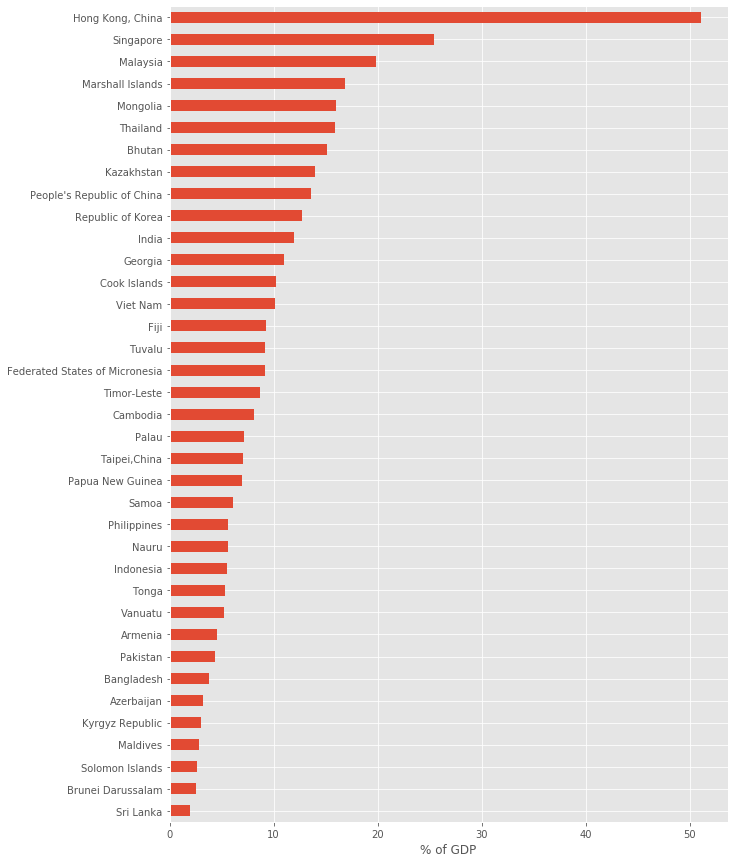

In [104]:
fig, ax = plt.subplots(figsize=(10, 15))

y[y > 1].plot(kind='barh', stacked=True, ax=ax)
ax.invert_yaxis()
ax.set_ylabel('')
ax.set_xlabel('% of GDP')

plt.show()

In [105]:
df3

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.593500e+09  1.525588e+09  8.019100e+10   
                      Georgia      5.334017e+09  1.754188e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.022064e+12  2.007842e+10  1.873280e+13   
                      Singapore    1.304455e+11  9.209001e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.234166   
                      Georgia      1.592500e+10    3731000.0  11.015312   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.627140   
                      Singapore    3.628180e+11    5638676.0  25.381875   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd            m1            m2  \
region                country                                                 
Central and West Asia Afghanistan      2.734893  0.000000e+00  0.000000e+00   
                      Armenia        207.836264  0.000000e+00  5.112384e+07   
                      Azerbaijan     153.443672  0.000000e+00  2.941176e+08   
                      Georgia        470.165738  1.600000e+08  3.058474e+08   
                      Kazakhstan    1302.013047  4.244997e+09  0.000000e+00   
...                                         ...           ...           ...   
Southeast Asia        Philippines    188.261237  4.321895e+09  2.357397e+09   
                      Singapore    16331.849993  2.823862e+09  0.000000e+00   
                      Thailand      1211.199412  0.000000e+00  2.647334e+10   
                      Timor-Leste    200.319881  0.000000e+00  4.000000e+06   
                      Viet Nam       277.402247  0.000000e+00  0.000000e+00   

                                             m3  ...    m10_pkg    m1_gdp  \
region                country                    ...                        
Central and West Asia Afghanistan  0.000000e+00  ...   0.000000  0.000000   
                      Armenia      0.000000e+00  ...  81.666667  0.000000   
                      Azerbaijan   0.000000e+00  ...  38.557933  0.000000   
                      Georgia      0.000000e+00  ...   9.373798  1.004710   
                      Kazakhstan   8.732565e+08  ...   0.000000  2.492278   
...                                         ...  ...        ...       ...   
Southeast Asia        Philippines  2.753833e+08  ...  14.186979  1.211246   
                      Singapore    2.096717e+10  ...   0.000000  0.778314   
                      Thailand     1.401530e+10  ...   0.000000  0.000000   
                      Timor-Leste  0.000000e+00  ...  39.370079  0.000000   
                      Viet Nam     1.360017e+10  ...   0.000000  0.000000   

   

In [106]:
df3.groupby(level=0).sum()

,amount_lcy,amount_usd,gdp_lcy,gdp_usd,popn,pkg_gdp,pkg_pc_usd,m1,m2,m3,...,m10_pkg,m1_gdp,m2_gdp,m3_gdp,m4_gdp,m5_gdp,m9_gdp,m10_gdp,m_others_gdp,m_others_pkg
region,,,,,,,,,,,,,,,,,,,,,
Central and West Asia,1.253293e+13,4.061675e+10,6.363661e+14,6.733910e+11,3.385120e+08,40.810606,2235.683744,4.621997e+09,2.115231e+09,4.721461e+09,...,129.598398,6.123788,3.439490,1.866679,0.000000,23.363799,0.010600,6.006251,6.016851,129.926141
East Asia,2.743313e+14,2.364410e+12,2.067429e+15,1.674246e+13,1.478575e+09,100.424500,33396.176320,5.817536e+11,2.367690e+11,1.560287e+11,...,90.940459,40.902611,4.305592,8.186286,1.412995,34.387977,0.503332,10.725707,11.229038,94.902384
Other ADB Members,3.820431e+14,1.632813e+13,6.132379e+14,4.818727e+13,1.015085e+09,538.485288,279311.293198,2.265820e+12,5.674782e+12,7.750977e+11,...,118.968506,73.413480,205.102567,20.429226,8.163474,202.285768,6.357145,22.733628,29.090773,138.551188
Other Economies,3.300433e+15,8.591522e+11,2.330315e+16,7.549986e+12,9.922108e+08,81.494673,7311.220042,1.571768e+11,4.009404e+11,5.624179e+10,...,137.709605,10.382028,28.460028,9.779218,0.421058,27.072253,0.000000,5.380089,5.380089,137.709605
Others,5.046988e+12,5.582951e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.106195e+10,4.995796e+12,2.820796e+11,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.455005
Pacific,1.334711e+10,2.479064e+09,2.162848e+11,3.469767e+10,1.108472e+07,93.791298,6389.260680,0.000000e+00,2.722817e+07,2.342255e+08,...,80.178571,0.000000,0.477018,2.882050,0.000000,84.845264,0.000000,5.586966,5.586966,80.178571
South Asia,2.746125e+13,3.653912e+11,2.556299e+14,3.378042e+12,1.565001e+09,35.684799,1298.881787,1.500588e+11,6.179337e+10,5.885815e+08,...,0.000000,6.368407,4.736497,0.185400,0.000000,24.389384,0.005110,0.000000,0.005110,0.042732
Southeast Asia,1.561823e+15,3.593955e+11,2.257556e+16,3.114703e+12,6.551682e+08,101.854370,21612.454164,2.611386e+10,5.034596e+10,7.444651e+10,...,158.383637,4.491562,9.873759,23.263149,1.107734,45.426326,3.583064,14.108777,17.691840,172.500260


In [107]:
url4 = 'https://raw.githubusercontent.com/jessonpagaduan/covid19policydatabase/master/ados_forecast.csv'

In [108]:
df4 = pd.read_csv(url4)

In [109]:
df4.set_index('country', inplace=True)

In [110]:
df4.columns

Index(['2020_gdp_ado', '2020_gdp_ados', '2021_ado_gdp', '2021_ados_gdp',
       '2020_ado_inf', '2020_inf_ados', '2021_ado_inf', '2021_ados_inf'],
      dtype='object')

In [111]:
df4.columns = ['gdp2020_ado', 'gdp2020_ados', 'gdp2021_ado', 'gdp2021_ados',
               'inf2020_ado', 'inf2020_ados', 'inf2021_ado', 'inf2021_ados']

In [112]:
df4

,gdp2020_ado,gdp2020_ados,gdp2021_ado,gdp2021_ados,inf2020_ado,inf2020_ados,inf2021_ado,inf2021_ados
country,,,,,,,,
Armenia,2.197094,-3.500000,4.499514,3.500000,2.800000,1.200000,2.200000,2.500000
Azerbaijan,0.500000,-0.100000,1.500000,1.200000,2.500000,2.800000,3.500000,3.500000
Georgia,-0.026479,-5.000000,4.450008,5.000000,4.500000,5.000000,3.000000,3.500000
Kazakhstan,1.800000,-1.200000,3.600000,3.400000,6.000000,7.900000,5.700000,6.200000
Kyrgyz Republic,4.000000,-5.000000,4.500000,4.000000,3.500000,7.000000,3.000000,5.000000
Tajikistan,5.500000,-3.600000,5.000000,7.000000,9.000000,10.000000,8.000000,8.500000
Turkmenistan,6.000000,3.200000,5.800000,5.800000,13.000000,8.000000,8.000000,8.000000
Uzbekistan,4.700000,1.500000,5.800000,6.500000,13.000000,13.000000,10.000000,10.000000
"Hong Kong, China",-3.300000,-6.500000,3.500000,5.100000,2.000000,1.500000,2.500000,2.500000


In [113]:
df4 = df4.assign(gdpf2020_change = lambda x: x.gdp2020_ados - x.gdp2020_ado)
df4 = df4.assign(gdpf2021_change = lambda x: x.gdp2021_ados - x.gdp2021_ado)
df4 = df4.assign(inff2020_change = lambda x: x.inf2020_ados - x.inf2020_ado)
df4 = df4.assign(inff2021_change = lambda x: x.inf2021_ados - x.inf2021_ado)

In [114]:
df4

,gdp2020_ado,gdp2020_ados,gdp2021_ado,gdp2021_ados,inf2020_ado,inf2020_ados,inf2021_ado,inf2021_ados,gdpf2020_change,gdpf2021_change,inff2020_change,inff2021_change
country,,,,,,,,,,,,
Armenia,2.197094,-3.500000,4.499514,3.500000,2.800000,1.200000,2.200000,2.500000,-5.697094,-0.999514,-1.600000,0.300000
Azerbaijan,0.500000,-0.100000,1.500000,1.200000,2.500000,2.800000,3.500000,3.500000,-0.600000,-0.300000,0.300000,0.000000
Georgia,-0.026479,-5.000000,4.450008,5.000000,4.500000,5.000000,3.000000,3.500000,-4.973521,0.549992,0.500000,0.500000
Kazakhstan,1.800000,-1.200000,3.600000,3.400000,6.000000,7.900000,5.700000,6.200000,-3.000000,-0.200000,1.900000,0.500000
Kyrgyz Republic,4.000000,-5.000000,4.500000,4.000000,3.500000,7.000000,3.000000,5.000000,-9.000000,-0.500000,3.500000,2.000000
Tajikistan,5.500000,-3.600000,5.000000,7.000000,9.000000,10.000000,8.000000,8.500000,-9.100000,2.000000,1.000000,0.500000
Turkmenistan,6.000000,3.200000,5.800000,5.800000,13.000000,8.000000,8.000000,8.000000,-2.800000,0.000000,-5.000000,0.000000
Uzbekistan,4.700000,1.500000,5.800000,6.500000,13.000000,13.000000,10.000000,10.000000,-3.200000,0.700000,0.000000,0.000000
"Hong Kong, China",-3.300000,-6.500000,3.500000,5.100000,2.000000,1.500000,2.500000,2.500000,-3.200000,1.600000,-0.500000,0.000000


In [115]:
df3

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.593500e+09  1.525588e+09  8.019100e+10   
                      Georgia      5.334017e+09  1.754188e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.022064e+12  2.007842e+10  1.873280e+13   
                      Singapore    1.304455e+11  9.209001e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.234166   
                      Georgia      1.592500e+10    3731000.0  11.015312   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.627140   
                      Singapore    3.628180e+11    5638676.0  25.381875   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd            m1            m2  \
region                country                                                 
Central and West Asia Afghanistan      2.734893  0.000000e+00  0.000000e+00   
                      Armenia        207.836264  0.000000e+00  5.112384e+07   
                      Azerbaijan     153.443672  0.000000e+00  2.941176e+08   
                      Georgia        470.165738  1.600000e+08  3.058474e+08   
                      Kazakhstan    1302.013047  4.244997e+09  0.000000e+00   
...                                         ...           ...           ...   
Southeast Asia        Philippines    188.261237  4.321895e+09  2.357397e+09   
                      Singapore    16331.849993  2.823862e+09  0.000000e+00   
                      Thailand      1211.199412  0.000000e+00  2.647334e+10   
                      Timor-Leste    200.319881  0.000000e+00  4.000000e+06   
                      Viet Nam       277.402247  0.000000e+00  0.000000e+00   

                                             m3  ...    m10_pkg    m1_gdp  \
region                country                    ...                        
Central and West Asia Afghanistan  0.000000e+00  ...   0.000000  0.000000   
                      Armenia      0.000000e+00  ...  81.666667  0.000000   
                      Azerbaijan   0.000000e+00  ...  38.557933  0.000000   
                      Georgia      0.000000e+00  ...   9.373798  1.004710   
                      Kazakhstan   8.732565e+08  ...   0.000000  2.492278   
...                                         ...  ...        ...       ...   
Southeast Asia        Philippines  2.753833e+08  ...  14.186979  1.211246   
                      Singapore    2.096717e+10  ...   0.000000  0.778314   
                      Thailand     1.401530e+10  ...   0.000000  0.000000   
                      Timor-Leste  0.000000e+00  ...  39.370079  0.000000   
                      Viet Nam     1.360017e+10  ...   0.000000  0.000000   

   

In [116]:
df5 = df3.reset_index(level=0).join(df4)

In [117]:
df5

,region,amount_lcy,amount_usd,gdp_lcy,gdp_usd,popn,pkg_gdp,pkg_pc_usd,m1,m2,...,gdp2021_ado,gdp2021_ados,inf2020_ado,inf2020_ados,inf2021_ado,inf2021_ados,gdpf2020_change,gdpf2021_change,inff2020_change,inff2021_change
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Central and West Asia,8.000000e+09,1.016625e+08,1.502470e+12,1.873400e+10,37172386.0,0.542663,2.734893,0.000000e+00,0.000000e+00,...,4.000000,3.000000,2.3,5.0,3.5,4.5,-7.500000,-1.000000,2.7,1.0
Armenia,Central and West Asia,3.000000e+11,6.134861e+08,6.541000e+12,1.344400e+10,2951776.0,4.563271,207.836264,0.000000e+00,5.112384e+07,...,4.499514,3.500000,2.8,1.2,2.2,2.5,-5.697094,-0.999514,-1.6,0.3
Azerbaijan,Central and West Asia,2.593500e+09,1.525588e+09,8.019100e+10,4.717100e+10,9942334.0,3.234166,153.443672,0.000000e+00,2.941176e+08,...,1.500000,1.200000,2.5,2.8,3.5,3.5,-0.600000,-0.300000,0.3,0.0
Georgia,Central and West Asia,5.334017e+09,1.754188e+09,4.474900e+10,1.592500e+10,3731000.0,11.015312,470.165738,1.600000e+08,3.058474e+08,...,4.450008,5.000000,4.5,5.0,3.0,3.5,-4.973521,0.549992,0.5,0.5
Kazakhstan,Central and West Asia,9.810000e+12,2.379624e+10,6.543920e+13,1.703260e+11,18276499.0,13.970997,1302.013047,4.244997e+09,0.000000e+00,...,3.600000,3.400000,6.0,7.9,5.7,6.2,-3.000000,-0.200000,1.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Philippines,Southeast Asia,1.022064e+12,2.007842e+10,1.873280e+13,3.568140e+11,106651922.0,5.627140,188.261237,4.321895e+09,2.357397e+09,...,6.500000,6.500000,2.2,2.2,2.4,2.4,-5.800000,0.000000,0.0,0.0
Singapore,Southeast Asia,1.304455e+11,9.209001e+10,4.980840e+11,3.628180e+11,5638676.0,25.381875,16331.849993,2.823862e+09,0.000000e+00,...,2.000000,3.200000,0.7,-0.2,1.3,0.8,-6.200000,1.200000,-0.9,-0.5
Thailand,Southeast Asia,2.700000e+12,8.409179e+10,1.692200e+13,5.291770e+11,69428524.0,15.891051,1211.199412,0.000000e+00,2.647334e+10,...,2.500000,3.500000,-0.9,-1.3,0.4,0.7,-1.700000,1.000000,-0.4,0.3


In [118]:
df5.loc[~df5.region.isin(['Other Economies', 'Other ADB Members', 'Others']),
        ['pkg_gdp', 'gdpf2020_change', 'inff2020_change']]

,pkg_gdp,gdpf2020_change,inff2020_change
country,,,
Afghanistan,0.542663,-7.500000,2.700000
Armenia,4.563271,-5.697094,-1.600000
Azerbaijan,3.234166,-0.600000,0.300000
Georgia,11.015312,-4.973521,0.500000
Kazakhstan,13.970997,-3.000000,1.900000
Kyrgyz Republic,3.002058,-9.000000,3.500000
Pakistan,4.413644,-3.000000,-0.500000
Tajikistan,0.015376,-9.100000,1.000000
Turkmenistan,0.000000,-2.800000,-5.000000


In [119]:
data1 = df5.loc[~df5.region.isin(['Other Economies', 'Other ADB Members', 'Others']),
        ['pkg_gdp', 'gdpf2020_change', 'inff2020_change']]

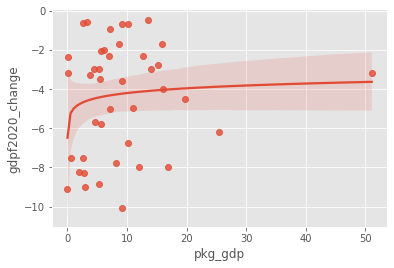

In [120]:
sns.regplot(x=data1['pkg_gdp'][data1.pkg_gdp > 0], y=data1['gdpf2020_change'][data1.pkg_gdp > 0], data=data1, logx=True)

In [121]:
data1.sort_values(by='pkg_gdp', ascending=False)[data1.pkg_gdp > 0].dropna()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,pkg_gdp,gdpf2020_change,inff2020_change
country,,,
"Hong Kong, China",51.073839,-3.200000,-0.500000
Singapore,25.381875,-6.200000,-0.900000
Malaysia,19.818149,-4.500000,-2.482230
Marshall Islands,16.818182,-8.000728,0.000000
Mongolia,15.988811,-4.000000,-0.200000
Thailand,15.891051,-1.700000,-0.400000
Bhutan,15.151040,-2.800000,-1.039103
Kazakhstan,13.970997,-3.000000,1.900000
People's Republic of China,13.603951,-0.457431,-0.300000


In [122]:
data2 = data1.sort_values(by='pkg_gdp', ascending=False)[data1.pkg_gdp > 0].dropna().loc['Malaysia':,]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [123]:
data2

,pkg_gdp,gdpf2020_change,inff2020_change
country,,,
Malaysia,19.818149,-4.500000,-2.482230
Marshall Islands,16.818182,-8.000728,0.000000
Mongolia,15.988811,-4.000000,-0.200000
Thailand,15.891051,-1.700000,-0.400000
Bhutan,15.151040,-2.800000,-1.039103
Kazakhstan,13.970997,-3.000000,1.900000
People's Republic of China,13.603951,-0.457431,-0.300000
Republic of Korea,12.679599,-2.300000,-0.432809
India,11.957565,-8.000000,0.000000


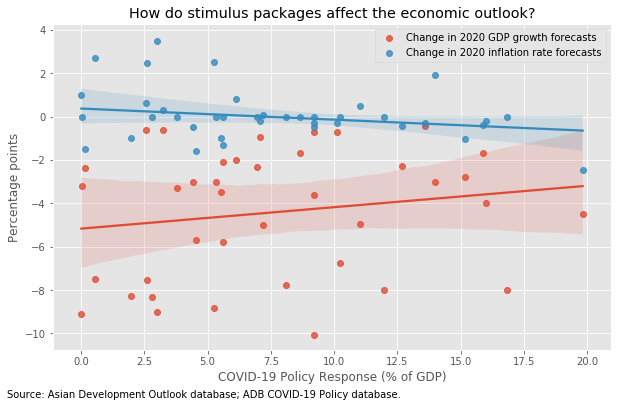

In [124]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(x=data2['pkg_gdp'], y=data2['gdpf2020_change'], robust=True, 
            label='Change in 2020 GDP growth forecasts',
            ax=ax)
sns.regplot(x=data2['pkg_gdp'], y=data2['inff2020_change'], robust=True, 
            label='Change in 2020 inflation rate forecasts',
            ax=ax)

ax.set(title='How do stimulus packages affect the economic outlook?',
       xlabel='COVID-19 Policy Response (% of GDP)',
       ylabel='Percentage points')
ax.legend()
ax.annotate('Source: Asian Development Outlook database; ADB COVID-19 Policy database.', 
            (-0.1,0), (10,-40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

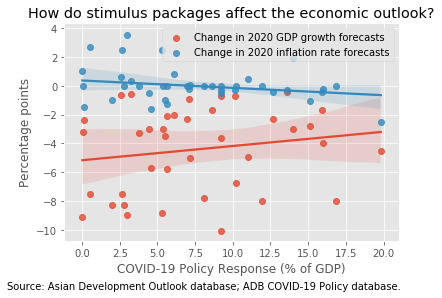

In [125]:
fig, ax = plt.subplots()

sns.regplot(x=data2['pkg_gdp'], y=data2['gdpf2020_change'], robust=True, 
            label='Change in 2020 GDP growth forecasts',
            ax=ax)
sns.regplot(x=data2['pkg_gdp'], y=data2['inff2020_change'], robust=True, 
            label='Change in 2020 inflation rate forecasts',
            ax=ax)

ax.set(title='How do stimulus packages affect the economic outlook?',
       xlabel='COVID-19 Policy Response (% of GDP)',
       ylabel='Percentage points')
ax.legend()
ax.annotate('Source: Asian Development Outlook database; ADB COVID-19 Policy database.', 
            (-0.2,0), (10,-40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [126]:
data2

,pkg_gdp,gdpf2020_change,inff2020_change
country,,,
Malaysia,19.818149,-4.500000,-2.482230
Marshall Islands,16.818182,-8.000728,0.000000
Mongolia,15.988811,-4.000000,-0.200000
Thailand,15.891051,-1.700000,-0.400000
Bhutan,15.151040,-2.800000,-1.039103
Kazakhstan,13.970997,-3.000000,1.900000
People's Republic of China,13.603951,-0.457431,-0.300000
Republic of Korea,12.679599,-2.300000,-0.432809
India,11.957565,-8.000000,0.000000


In [127]:
data3 = data2.sort_values(by='pkg_gdp', ascending=False)[data2.pkg_gdp > 0].dropna()

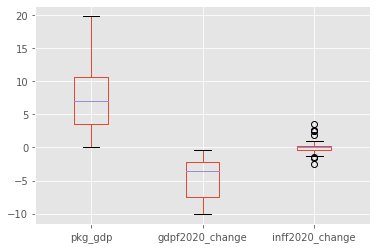

In [128]:
data3.plot(kind='box')

In [129]:
data3.index.isin(['Kyrgyz Republic', 'Afghanistan', 'Vanuatu', 'Armenia', 'Malaysia'])

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False])

In [130]:
data3.sort_values(by='inff2020_change', ascending=False)

,pkg_gdp,gdpf2020_change,inff2020_change
country,,,
Kyrgyz Republic,3.002058,-9.000000,3.500000
Afghanistan,0.542663,-7.500000,2.700000
Vanuatu,5.272368,-8.828478,2.514311
Solomon Islands,2.615866,-7.542076,2.487545
Kazakhstan,13.970997,-3.000000,1.900000
Tajikistan,0.015376,-9.100000,1.000000
Samoa,6.120475,-1.999596,0.800000
Brunei Darussalam,2.554178,-0.638426,0.600000
Georgia,11.015312,-4.973521,0.500000


In [131]:
mask = data3.index.isin(['Kyrgyz Republic', 'Afghanistan', 'Vanuatu', 'Armenia', 'Malaysia'])

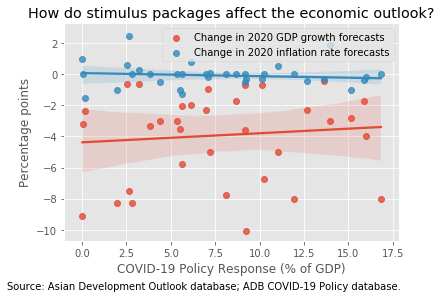

In [132]:
fig, ax = plt.subplots()

sns.regplot(x=data2['pkg_gdp'][~mask], y=data2['gdpf2020_change'][~mask], robust=True, 
            label='Change in 2020 GDP growth forecasts',
            ax=ax)
sns.regplot(x=data2['pkg_gdp'][~mask], y=data2['inff2020_change'][~mask], robust=True, 
            label='Change in 2020 inflation rate forecasts',
            ax=ax)

ax.set(title='How do stimulus packages affect the economic outlook?',
       xlabel='COVID-19 Policy Response (% of GDP)',
       ylabel='Percentage points')
ax.legend()
ax.annotate('Source: Asian Development Outlook database; ADB COVID-19 Policy database.', 
            (-0.2,0), (10,-40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()